In [404]:
import sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [405]:
import warnings
warnings.filterwarnings('ignore')

In [406]:
print(f'Python  version: {sys.version}')
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')

Python  version: 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
pandas  version: 1.4.4
numpy   version: 1.22.4


In [407]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [408]:
data1 = pd.read_csv('/content/drive/MyDrive/code/code/phrakanong/dataAir_phrakanong.csv',usecols=[0,1,2,3,4,5,6,7,8,9,10,11],parse_dates=['date'], skipinitialspace=True)
data1

date        pm10    co     no   no2    nox  pm25  avgT  humid  \
0    2018-01-01   65.291667  1.33   74.2  45.4  119.5   NaN  27.1     70   
1    2018-01-02   77.041667  1.35   73.0  51.3  124.2   NaN  27.5     67   
2    2018-01-03   96.708333  1.73   98.5  58.0  156.5   NaN  28.2     66   
3    2018-01-04  115.125000  1.76   92.4  62.7  155.2   NaN  29.3     64   
4    2018-01-05  116.625000  1.35   51.1  60.9  111.9   NaN  30.4     63   
...         ...         ...   ...    ...   ...    ...   ...   ...    ...   
1760 2022-10-27   84.000000  1.50  117.6  35.2  152.9  19.0  28.5     79   
1761 2022-10-28   92.000000  1.60  127.1  38.1  165.2  21.0  29.6     72   
1762 2022-10-29   90.000000  1.30   92.0  43.1  135.1  23.0  29.5     62   
1763 2022-10-30   95.000000  1.30   76.9  51.5  128.4  32.0  30.0     62   
1764 2022-10-31   88.000000  1.60   86.9  58.1  145.0  40.0   NaN     59   

      pressure-monthly  windDir  windSpd  
0              1009.40    100.0      9.0  
1              1009.40    120.0      4.0  
2              1009.40     60.0      4.0  
3              1009.40    330.0      6.0  
4              1009.40      NaN      NaN  
...                ...      ...      ...  
1760           1009.24    120.0      9.0  
1761           1009.24    170.0      7.0  
1762           1009.24    120.0     13.0  
1763           1009.24    120.0     13.0  
1764           1009.24      NaN      NaN  

[1765 rows x 12 columns]

In [ ]:
data1.info()

In [392]:
data2=data1.sort_values('date').reset_index(drop=True).copy()
data2

date        pm10    co     no   no2    nox  pm25  avgT  humid  \
0    2018-01-01   65.291667  1.33   74.2  45.4  119.5   NaN  27.1     70   
1    2018-01-02   77.041667  1.35   73.0  51.3  124.2   NaN  27.5     67   
2    2018-01-03   96.708333  1.73   98.5  58.0  156.5   NaN  28.2     66   
3    2018-01-04  115.125000  1.76   92.4  62.7  155.2   NaN  29.3     64   
4    2018-01-05  116.625000  1.35   51.1  60.9  111.9   NaN  30.4     63   
...         ...         ...   ...    ...   ...    ...   ...   ...    ...   
1760 2022-10-27   84.000000  1.50  117.6  35.2  152.9  19.0  28.5     79   
1761 2022-10-28   92.000000  1.60  127.1  38.1  165.2  21.0  29.6     72   
1762 2022-10-29   90.000000  1.30   92.0  43.1  135.1  23.0  29.5     62   
1763 2022-10-30   95.000000  1.30   76.9  51.5  128.4  32.0  30.0     62   
1764 2022-10-31   88.000000  1.60   86.9  58.1  145.0  40.0   NaN     59   

      pressure-monthly  windDir  windSpd  
0              1009.40    100.0      9.0  
1              1009.40    120.0      4.0  
2              1009.40     60.0      4.0  
3              1009.40    330.0      6.0  
4              1009.40      NaN      NaN  
...                ...      ...      ...  
1760           1009.24    120.0      9.0  
1761           1009.24    170.0      7.0  
1762           1009.24    120.0     13.0  
1763           1009.24    120.0     13.0  
1764           1009.24      NaN      NaN  

[1765 rows x 12 columns]

In [393]:
y_col='pm25'

In [394]:
data2.dropna(subset=[y_col], inplace=True)
data2=data2.reset_index(drop=True)
data2

date   pm10    co     no   no2    nox  pm25  avgT  humid  \
0    2020-01-13   70.0  1.04   49.7  24.4   74.1  42.0  30.1     77   
1    2020-01-20  116.0  1.36   68.2  34.7  102.9  68.0  30.6     76   
2    2020-01-21   95.0  1.06   47.3  22.9   70.2  49.0  30.3     77   
3    2020-01-22   74.0  0.74   16.6  26.3   42.8  36.0  31.6     77   
4    2020-01-23   57.0  0.55    6.5  14.1   20.6  29.0  30.8     75   
...         ...    ...   ...    ...   ...    ...   ...   ...    ...   
1011 2022-10-27   84.0  1.50  117.6  35.2  152.9  19.0  28.5     79   
1012 2022-10-28   92.0  1.60  127.1  38.1  165.2  21.0  29.6     72   
1013 2022-10-29   90.0  1.30   92.0  43.1  135.1  23.0  29.5     62   
1014 2022-10-30   95.0  1.30   76.9  51.5  128.4  32.0  30.0     62   
1015 2022-10-31   88.0  1.60   86.9  58.1  145.0  40.0   NaN     59   

      pressure-monthly  windDir  windSpd  
0              1011.12    130.0      6.0  
1              1011.12    150.0      5.0  
2              1011.12    160.0      6.0  
3              1011.12    150.0      6.0  
4              1011.12    160.0      7.0  
...                ...      ...      ...  
1011           1009.24    120.0      9.0  
1012           1009.24    170.0      7.0  
1013           1009.24    120.0     13.0  
1014           1009.24    120.0     13.0  
1015           1009.24      NaN      NaN  

[1016 rows x 12 columns]

In [395]:
def date_parts(data, date_colname='date'):
    '''create year, month, day, dayname columns'''
    data['year']=data['date'].dt.year
    data['month']=data['date'].dt.month
    data['day']=data['date'].dt.day
    data['day_name']=data['date'].dt.day_name().astype('category')

In [396]:
date_parts(data2)

In [397]:
data2

date   pm10    co     no   no2    nox  pm25  avgT  humid  \
0    2020-01-13   70.0  1.04   49.7  24.4   74.1  42.0  30.1     77   
1    2020-01-20  116.0  1.36   68.2  34.7  102.9  68.0  30.6     76   
2    2020-01-21   95.0  1.06   47.3  22.9   70.2  49.0  30.3     77   
3    2020-01-22   74.0  0.74   16.6  26.3   42.8  36.0  31.6     77   
4    2020-01-23   57.0  0.55    6.5  14.1   20.6  29.0  30.8     75   
...         ...    ...   ...    ...   ...    ...   ...   ...    ...   
1011 2022-10-27   84.0  1.50  117.6  35.2  152.9  19.0  28.5     79   
1012 2022-10-28   92.0  1.60  127.1  38.1  165.2  21.0  29.6     72   
1013 2022-10-29   90.0  1.30   92.0  43.1  135.1  23.0  29.5     62   
1014 2022-10-30   95.0  1.30   76.9  51.5  128.4  32.0  30.0     62   
1015 2022-10-31   88.0  1.60   86.9  58.1  145.0  40.0   NaN     59   

      pressure-monthly  windDir  windSpd  year  month  day   day_name  
0              1011.12    130.0      6.0  2020      1   13     Monday  
1              1011.12    150.0      5.0  2020      1   20     Monday  
2              1011.12    160.0      6.0  2020      1   21    Tuesday  
3              1011.12    150.0      6.0  2020      1   22  Wednesday  
4              1011.12    160.0      7.0  2020      1   23   Thursday  
...                ...      ...      ...   ...    ...  ...        ...  
1011           1009.24    120.0      9.0  2022     10   27   Thursday  
1012           1009.24    170.0      7.0  2022     10   28     Friday  
1013           1009.24    120.0     13.0  2022     10   29   Saturday  
1014           1009.24    120.0     13.0  2022     10   30     Sunday  
1015           1009.24      NaN      NaN  2022     10   31     Monday  

[1016 rows x 16 columns]

In [398]:
data2.columns

Index(['date', 'pm10', 'co', 'no', 'no2', 'nox', 'pm25', 'avgT', 'humid',
       'pressure-monthly', 'windDir', 'windSpd', 'year', 'month', 'day',
       'day_name'],
      dtype='object')

In [399]:
df1=data2[['date', 'year', 'month', 'day', 'day_name', y_col]]
df1

date  year  month  day   day_name  pm25
0    2020-01-13  2020      1   13     Monday  42.0
1    2020-01-20  2020      1   20     Monday  68.0
2    2020-01-21  2020      1   21    Tuesday  49.0
3    2020-01-22  2020      1   22  Wednesday  36.0
4    2020-01-23  2020      1   23   Thursday  29.0
...         ...   ...    ...  ...        ...   ...
1011 2022-10-27  2022     10   27   Thursday  19.0
1012 2022-10-28  2022     10   28     Friday  21.0
1013 2022-10-29  2022     10   29   Saturday  23.0
1014 2022-10-30  2022     10   30     Sunday  32.0
1015 2022-10-31  2022     10   31     Monday  40.0

[1016 rows x 6 columns]

In [400]:
df1=df1.set_index('date')
df1

year  month  day   day_name  pm25
date                                         
2020-01-13  2020      1   13     Monday  42.0
2020-01-20  2020      1   20     Monday  68.0
2020-01-21  2020      1   21    Tuesday  49.0
2020-01-22  2020      1   22  Wednesday  36.0
2020-01-23  2020      1   23   Thursday  29.0
...          ...    ...  ...        ...   ...
2022-10-27  2022     10   27   Thursday  19.0
2022-10-28  2022     10   28     Friday  21.0
2022-10-29  2022     10   29   Saturday  23.0
2022-10-30  2022     10   30     Sunday  32.0
2022-10-31  2022     10   31     Monday  40.0

[1016 rows x 5 columns]

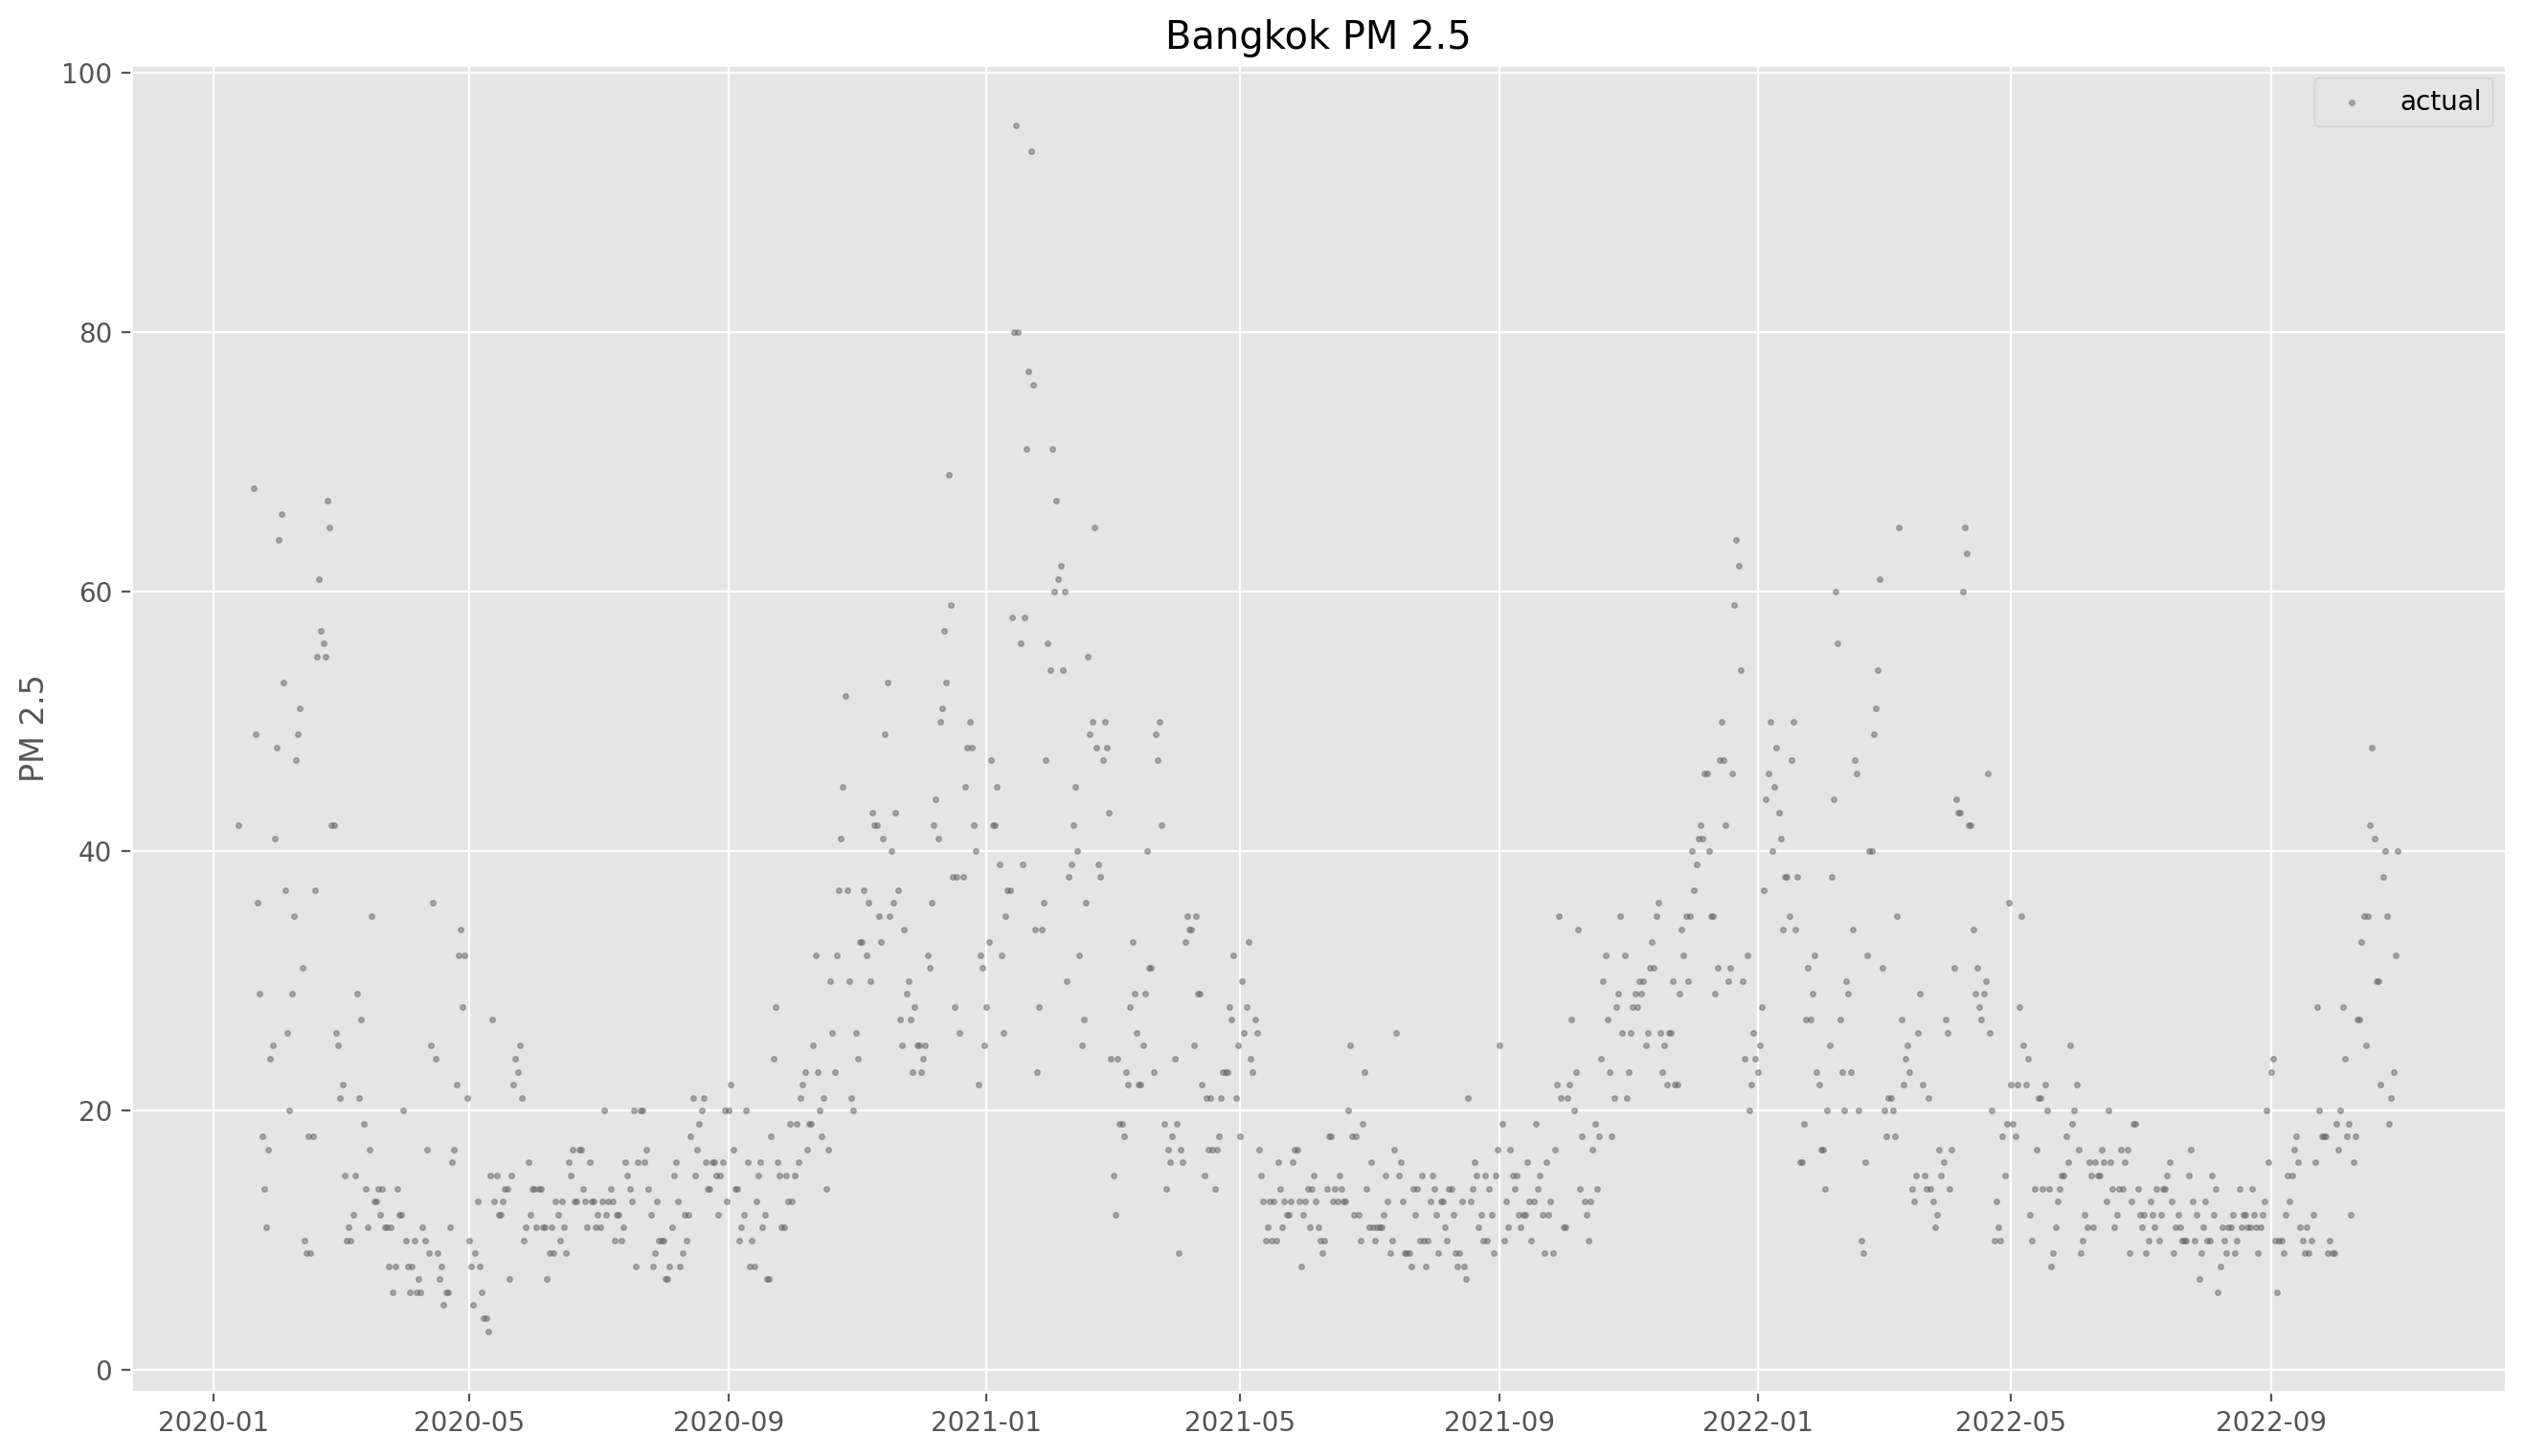

In [239]:
plt.figure(figsize=(16, 9))
plt.scatter(df1.index, df1[y_col], alpha=.5, s=4, label='actual', color='.4')
plt.ylabel('PM 2.5')
plt.title('Bangkok PM 2.5')
plt.legend();

In [240]:
feature_cols=[
    'year', 'month', 
    'day', 
    'day_name'
]
X=df1[feature_cols]
y=df1[y_col]

In [241]:
split_at = 900
X_train, X_test, y_train, y_test=X[:split_at], X[split_at:], y[:split_at], y[split_at:]

In [242]:
import lightgbm as lgb
print(f'lightgbm version = {lgb.__version__}')

lightgbm version = 3.3.5


In [243]:
light_reg = lgb.LGBMRegressor()

In [244]:
light_reg.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [245]:
params={'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
}
# reg = lgb.LGBMRegressor()
# reg = lgb.LGBMRegressor(**params)

In [246]:
fit_params={'early_stopping_rounds':200, 
            'eval_set': [(X_test, y_test)],
            'verbose': 10
           }
light_reg.fit(X_train, y_train, **fit_params)

[10]	valid_0's l2: 49.433
[20]	valid_0's l2: 40.8411
[30]	valid_0's l2: 40.2238
[40]	valid_0's l2: 42.2801
[50]	valid_0's l2: 42.6263
[60]	valid_0's l2: 43.439
[70]	valid_0's l2: 43.7984
[80]	valid_0's l2: 43.879
[90]	valid_0's l2: 44.7745
[100]	valid_0's l2: 45.925


LGBMRegressor()

In [247]:
light_reg.__dict__

{'boosting_type': 'gbdt',
 'objective': None,
 'num_leaves': 31,
 'max_depth': -1,
 'learning_rate': 0.1,
 'n_estimators': 100,
 'subsample_for_bin': 200000,
 'min_split_gain': 0.0,
 'min_child_weight': 0.001,
 'min_child_samples': 20,
 'subsample': 1.0,
 'subsample_freq': 0,
 'colsample_bytree': 1.0,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'random_state': None,
 'n_jobs': -1,
 'silent': 'warn',
 'importance_type': 'split',
 '_Booster': <lightgbm.basic.Booster at 0x7ff336e03a90>,
 '_evals_result': {'valid_0': OrderedDict([('l2',
                [114.69746953586304,
                 100.51779532427614,
                 88.8282524624828,
                 79.2643928966438,
                 71.52674511294144,
                 65.32622958279784,
                 60.275905228443,
                 56.15127159615961,
                 52.53710313317954,
                 49.432968469610145,
                 47.44524575918484,
                 45.75354078029006,
                 44.18562147356723

In [248]:
light_pred = light_reg.predict(X_test)

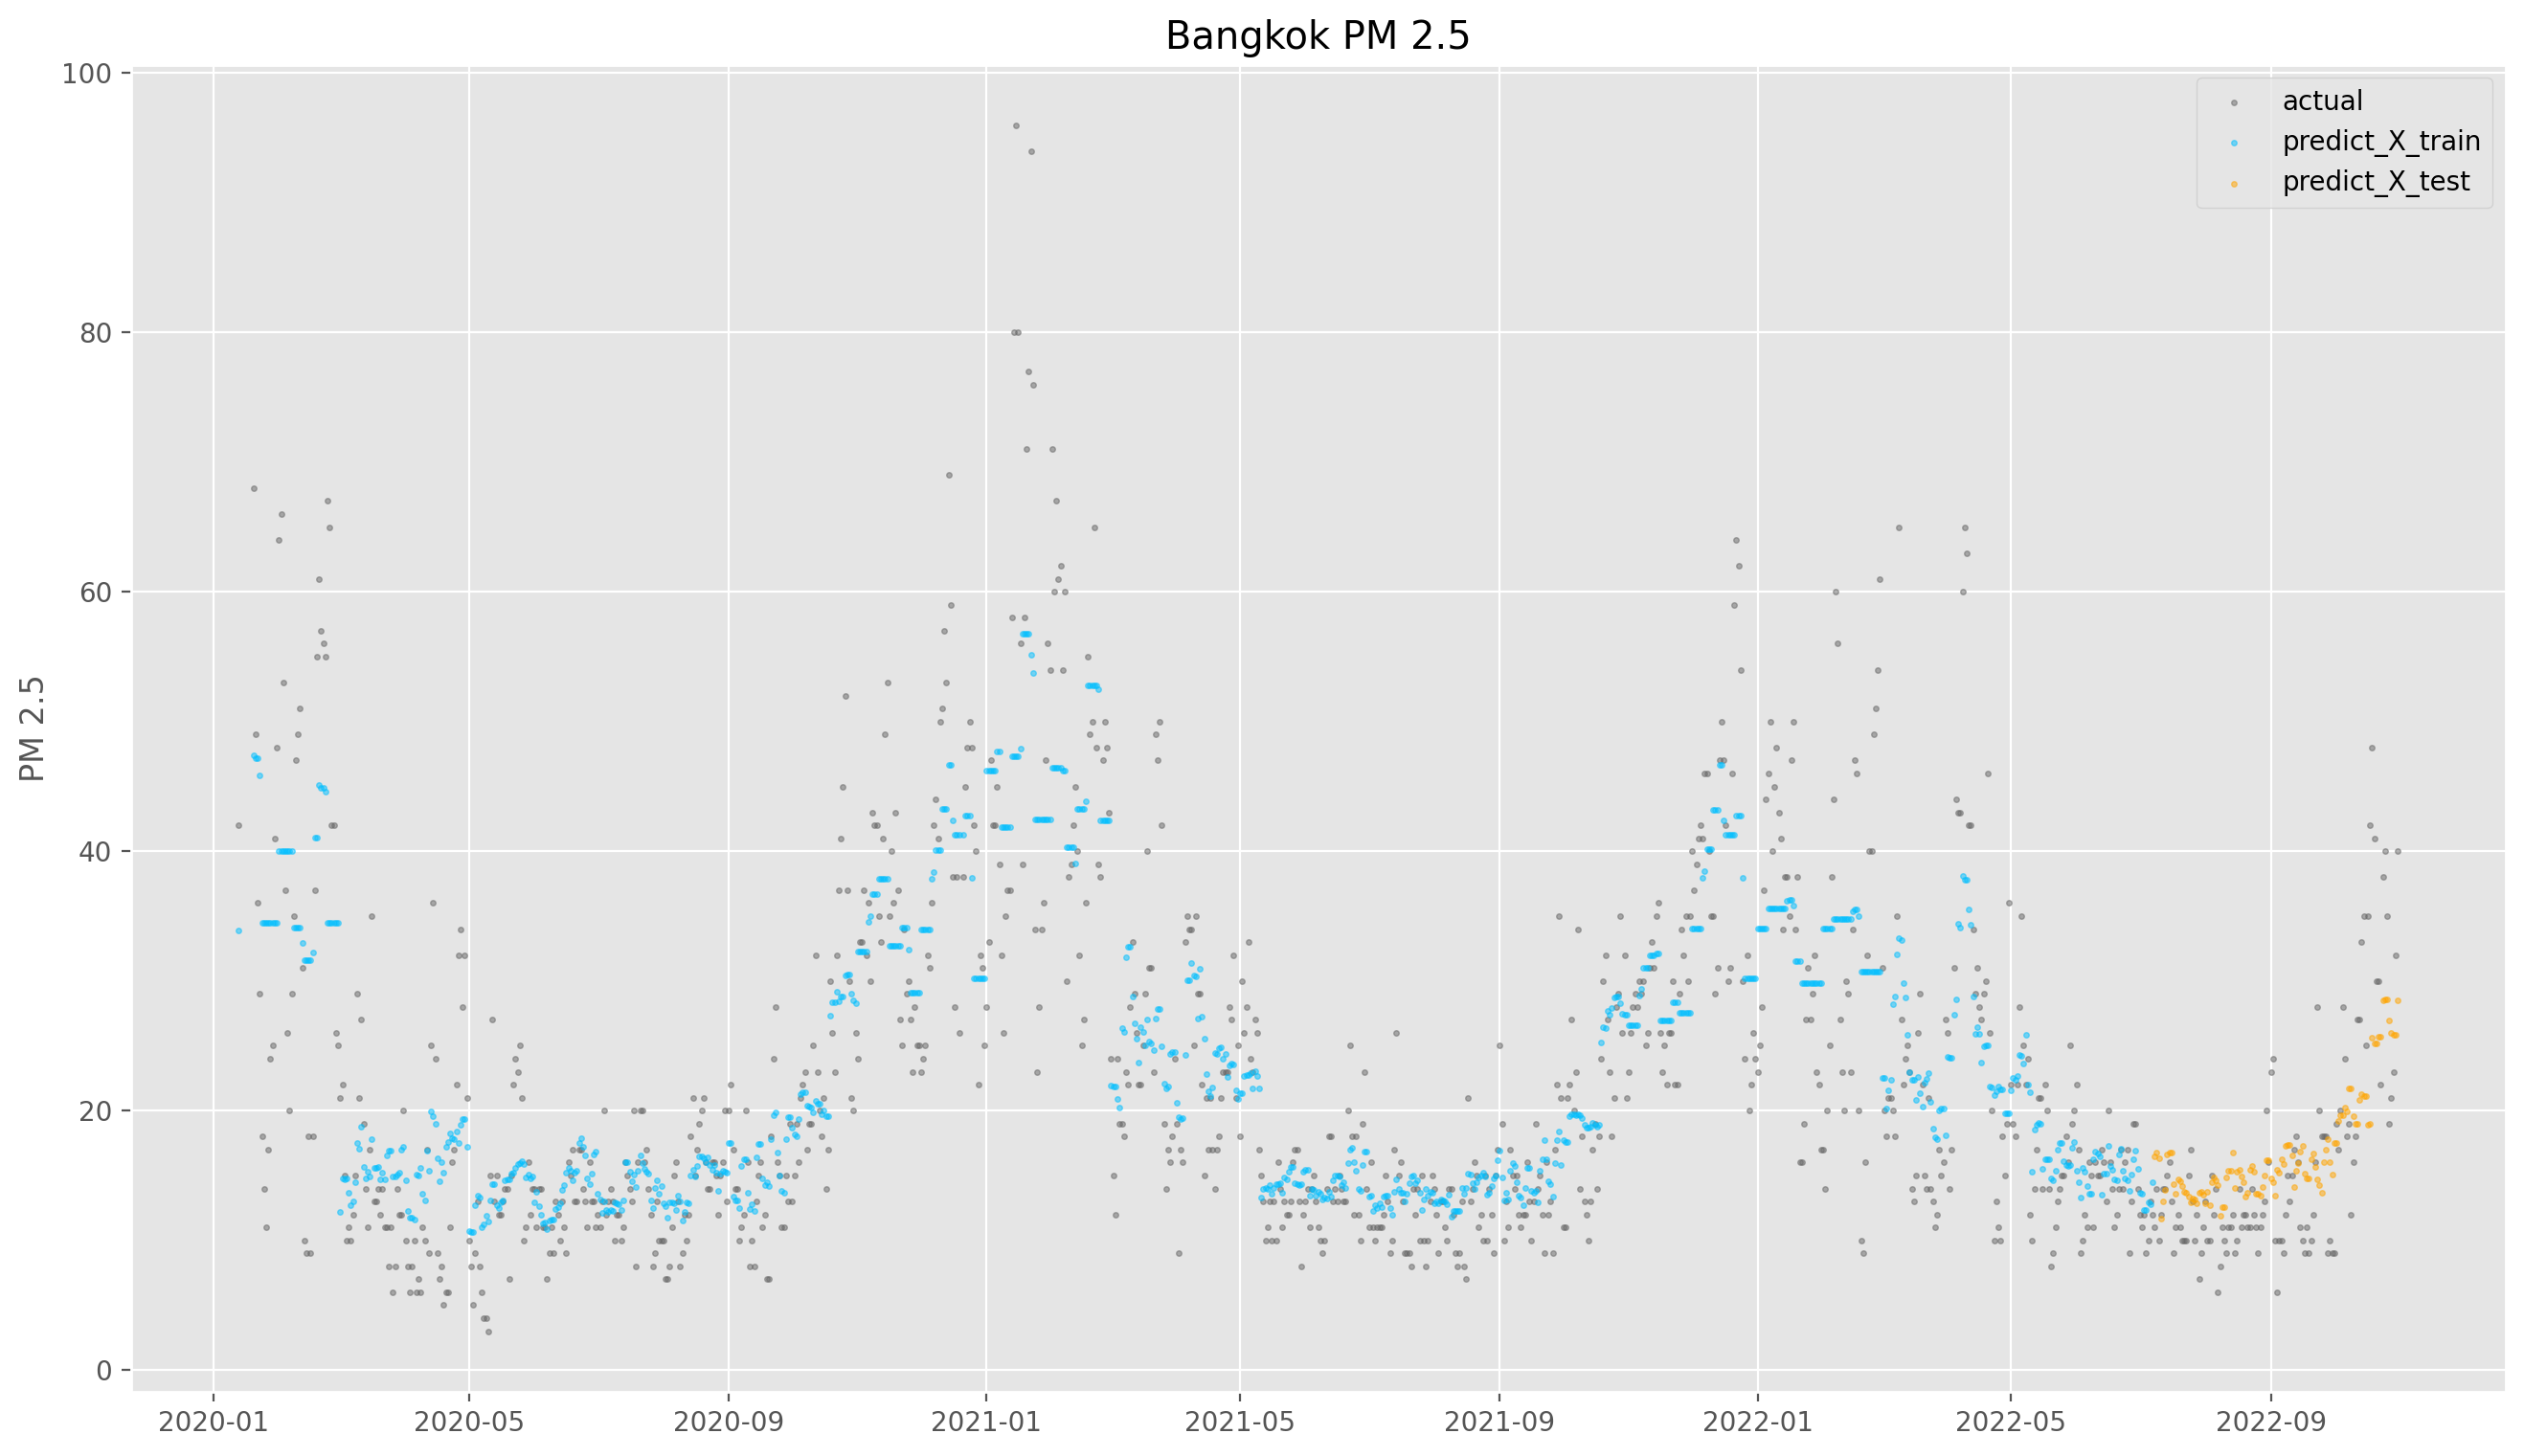

In [249]:
plt.figure(figsize=(16, 9))
plt.scatter(df1.index, df1[y_col], alpha=.5, s=4, label='actual', color='.4')
plt.scatter(X_train.index, light_reg.predict(X_train), alpha=.5, s=4, label='predict_X_train', color='deepskyblue')
plt.scatter(X_test.index, light_reg.predict(X_test), alpha=.5, s=4, label='predict_X_test', color='orange')
plt.ylabel('PM 2.5')
plt.title('Bangkok PM 2.5')
plt.legend();

In [250]:
df1.head(3000)

year  month  day   day_name  pm25
date                                         
2020-01-13  2020      1   13     Monday  42.0
2020-01-20  2020      1   20     Monday  68.0
2020-01-21  2020      1   21    Tuesday  49.0
2020-01-22  2020      1   22  Wednesday  36.0
2020-01-23  2020      1   23   Thursday  29.0
...          ...    ...  ...        ...   ...
2022-10-27  2022     10   27   Thursday  19.0
2022-10-28  2022     10   28     Friday  21.0
2022-10-29  2022     10   29   Saturday  23.0
2022-10-30  2022     10   30     Sunday  32.0
2022-10-31  2022     10   31     Monday  40.0

[1016 rows x 5 columns]

In [251]:
yhat1=[]

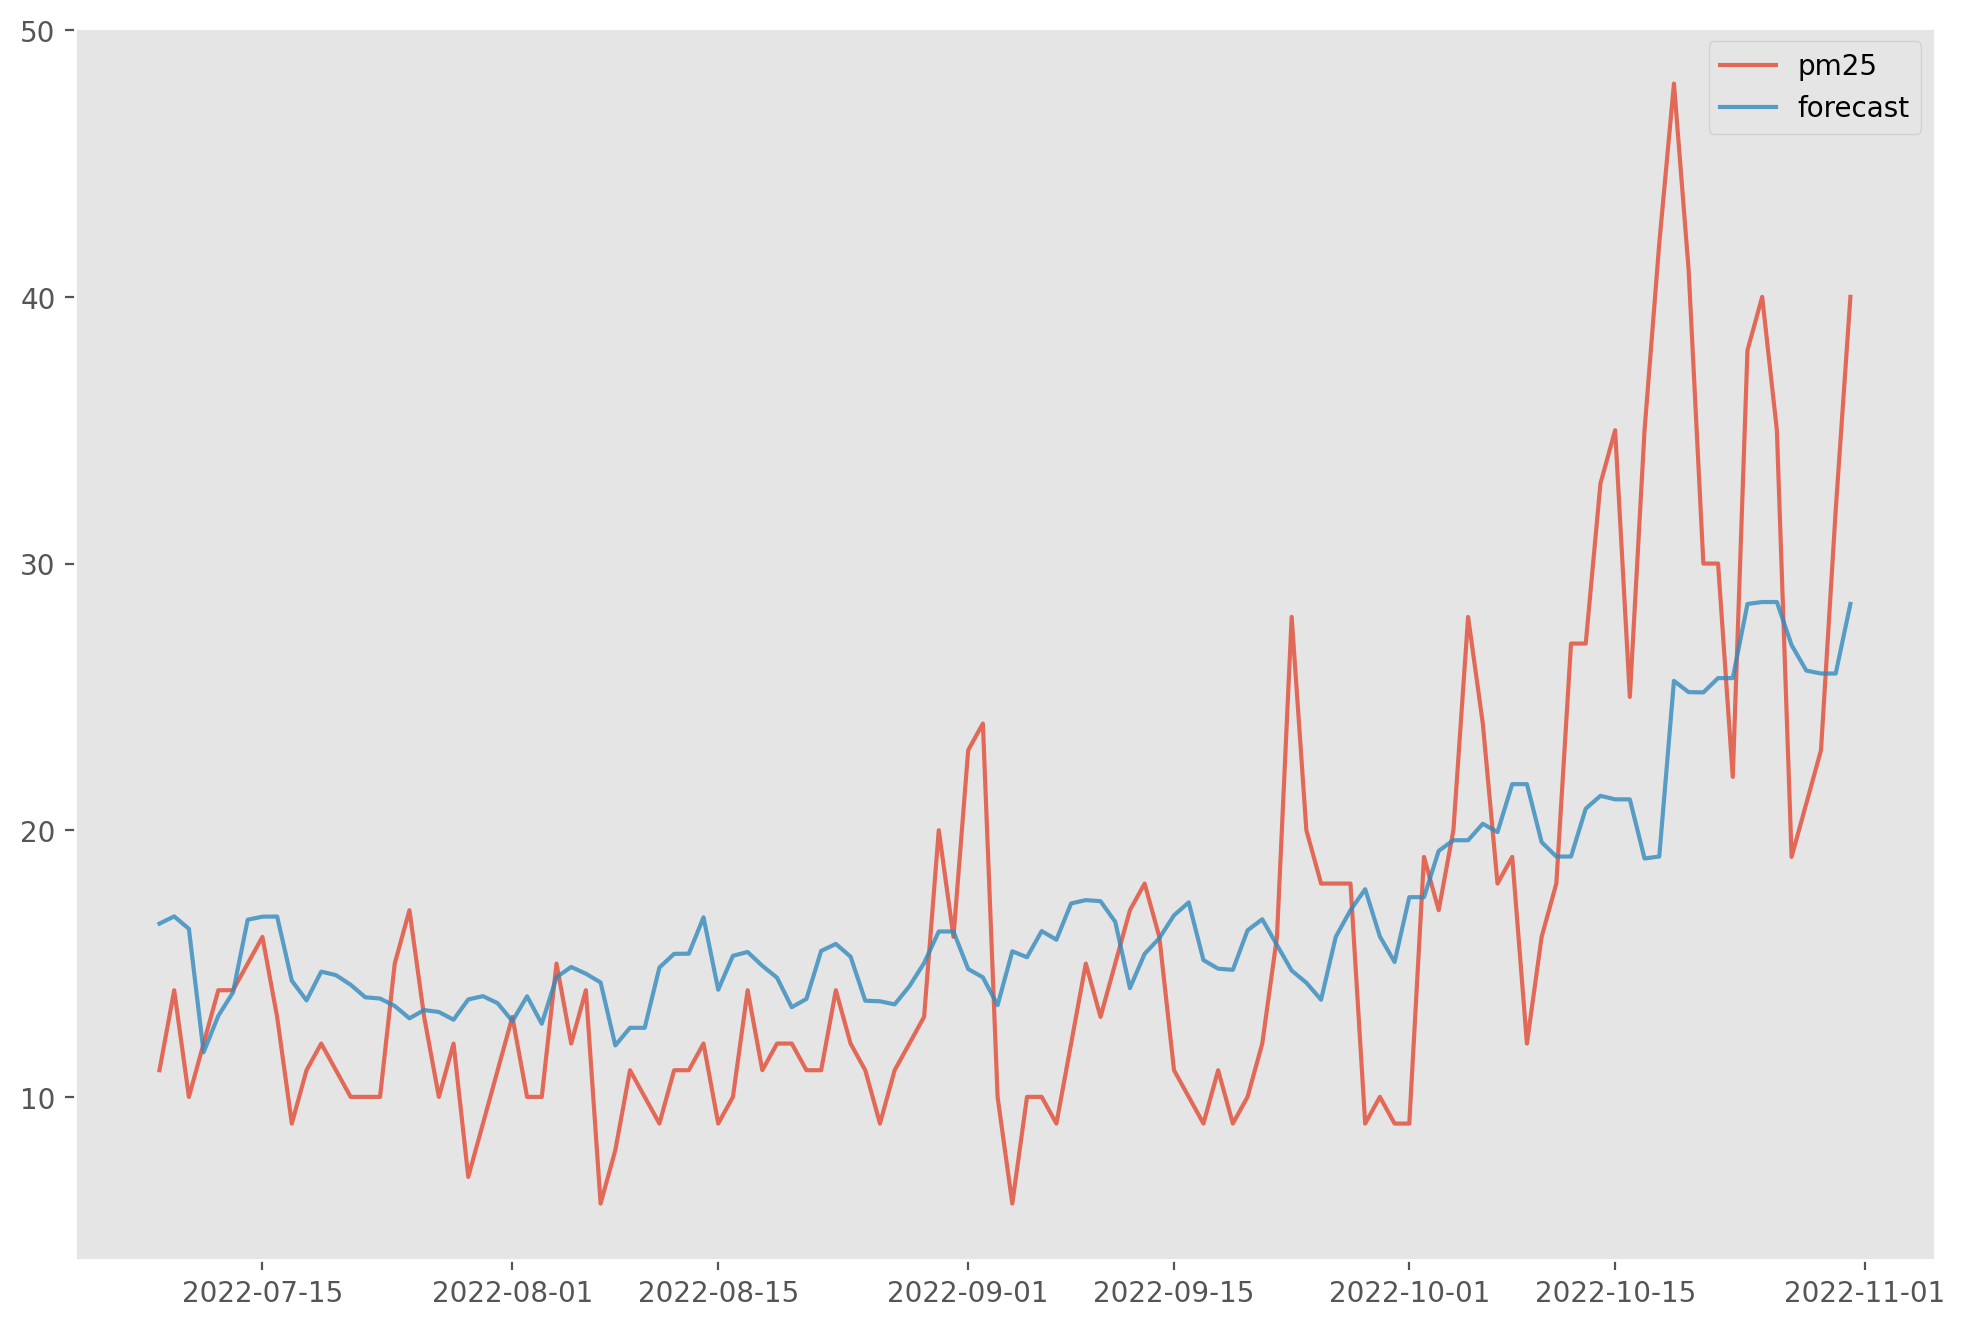

In [252]:
# test พยากรณ์กราฟ
yhat1 = light_reg.predict(X_test)

# Constructing the forecast dataframe
fc = df1.tail(len(yhat1)).copy() #ข้อมูลส่วนท้ายเป็น test
fc.reset_index(inplace=True)
fc['forecast'] = yhat1
# Ploting the forecasts
plt.figure(figsize=(12, 8))
for dtype in ['pm25', 'forecast']: #'forecast'

    plt.plot(
        'date',
        dtype,
        data=fc,
        label=dtype,
        alpha=0.8
    )
plt.legend()
plt.grid()
plt.show()

In [253]:
predict = pd.DataFrame(yhat1)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'}).head(7)
ypred


พยากรณ์ PM2.5
0      16.497708
1      16.769364
2      16.301878
3      11.673666
4      13.039650
5      13.918135
6      16.645287

In [254]:
Y_pred=light_reg.predict(X_test)
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(Y_pred,y_test)
print('MSE',mse1)
rmse = np.sqrt(mse1)
print('RMSE',rmse)

 
test=X_test.copy()
test['light_pred'] = light_pred
test

MSE 39.709173194548754
RMSE 6.301521498380272


year  month  day  day_name  light_pred
date                                              
2022-07-08  2022      7    8    Friday   16.497708
2022-07-09  2022      7    9  Saturday   16.769364
2022-07-10  2022      7   10    Sunday   16.301878
2022-07-11  2022      7   11    Monday   11.673666
2022-07-12  2022      7   12   Tuesday   13.039650
...          ...    ...  ...       ...         ...
2022-10-27  2022     10   27  Thursday   26.943007
2022-10-28  2022     10   28    Friday   25.987796
2022-10-29  2022     10   29  Saturday   25.876544
2022-10-30  2022     10   30    Sunday   25.876544
2022-10-31  2022     10   31    Monday   28.484477

[116 rows x 5 columns]

In [255]:
#LSTM

In [256]:
from pandas import read_csv
from datetime import datetime
	
df2 = pd.read_csv('/content/drive/MyDrive/code/code/phrakanong/dataAir_phrakanong.csv', usecols=[0,1,2,3,4,5,6,7,8,9,10,11], engine='python',parse_dates=['date'], skipinitialspace=True, index_col=0)


In [257]:
df2.describe().round(2).T

count     mean    std      min      25%      50%      75%  \
pm10              1721.0    57.31  29.08     1.17    35.00    52.00    73.00   
co                1737.0     0.97   0.54     0.04     0.52     0.83     1.40   
no                1739.0    47.45  40.48     0.10    13.20    34.70    74.02   
no2               1739.0    24.82  16.06     0.96    12.35    19.10    35.50   
nox               1738.0    72.09  54.36     5.03    26.92    53.30   110.84   
pm25              1016.0    23.01  14.23     3.00    13.00    18.00    30.00   
avgT              1695.0    30.24   1.76    16.60    29.30    30.30    31.30   
humid             1765.0    73.93   8.26    32.00    69.00    74.00    79.00   
pressure-monthly  1765.0  1008.48   2.13  1004.94  1006.53  1008.20  1010.15   
windDir           1735.0   188.91  85.55     0.00   120.00   190.00   250.00   
windSpd           1737.0     8.07   2.61     1.00     6.00     8.00     9.00   

                      max  
pm10               218.50  
co                   2.53  
no                 207.20  
no2                105.56  
nox                276.50  
pm25                96.00  
avgT                35.10  
humid               97.00  
pressure-monthly  1012.61  
windDir            360.00  
windSpd             24.00

In [258]:
dd = df2.drop(['pm10', 'no','no2', 'nox', 'co', 'avgT', 'humid', 'pressure-monthly','windDir','windSpd'],axis = 1)
dd.head()

pm25
date            
2018-01-01   NaN
2018-01-02   NaN
2018-01-03   NaN
2018-01-04   NaN
2018-01-05   NaN

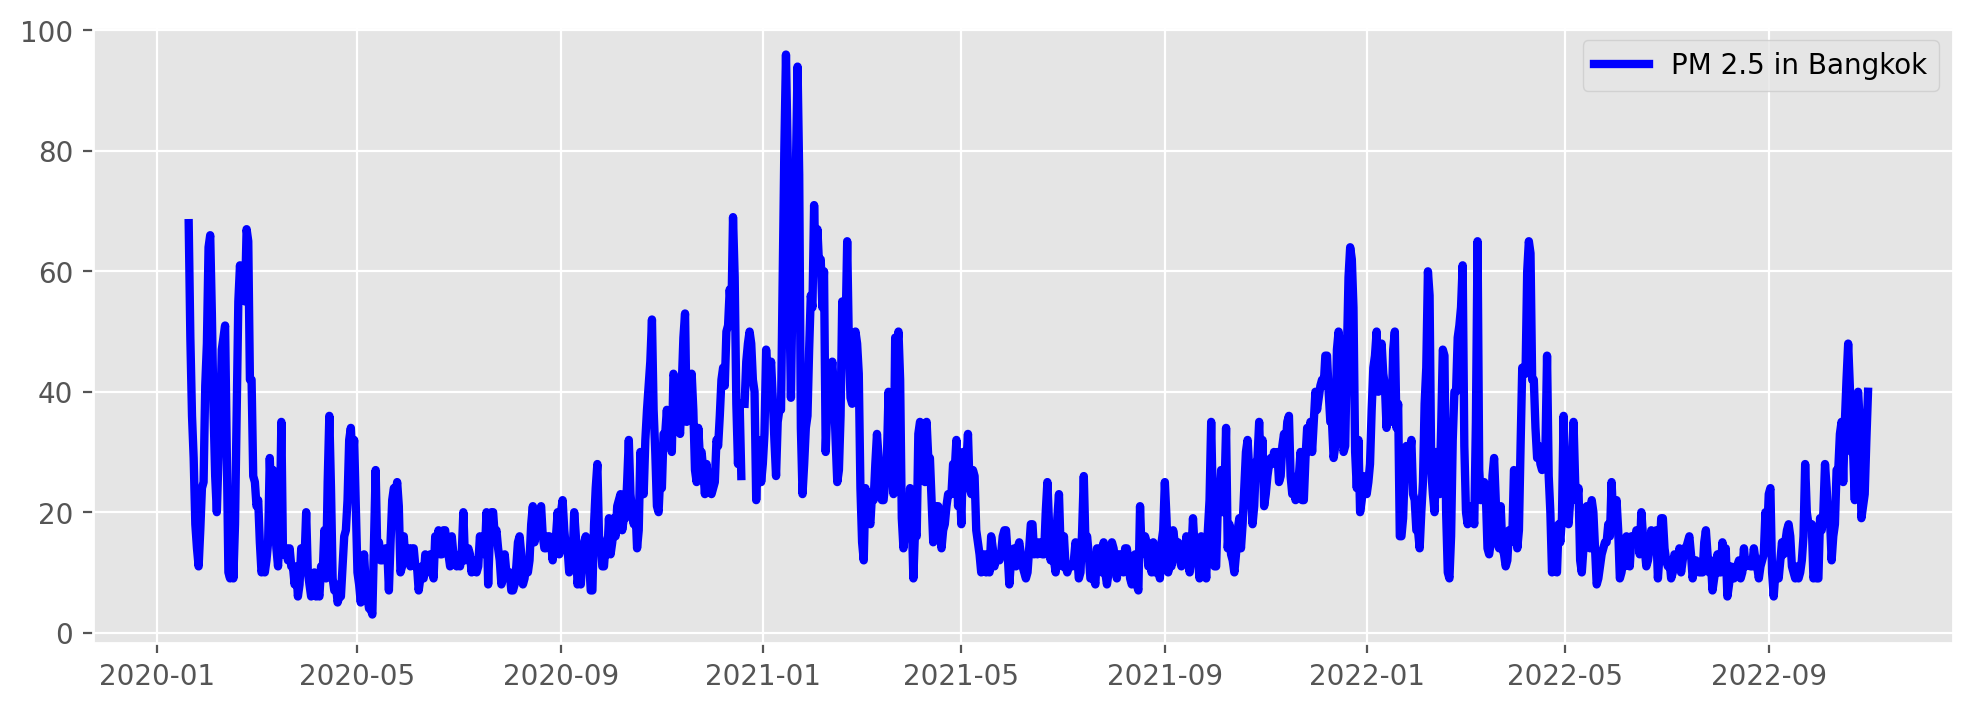

In [259]:
plt.figure(figsize=(12, 4))
plt.plot(dd, 'b', lw=3.0, label='PM 2.5 in Bangkok')
plt.legend()
plt.show()

In [260]:
y_col='pm25'

In [261]:
df2.dropna(subset=[y_col], inplace=True)
df = df2.reset_index(drop=True)
df

pm10    co     no   no2    nox  pm25  avgT  humid  pressure-monthly  \
0      70.0  1.04   49.7  24.4   74.1  42.0  30.1     77           1011.12   
1     116.0  1.36   68.2  34.7  102.9  68.0  30.6     76           1011.12   
2      95.0  1.06   47.3  22.9   70.2  49.0  30.3     77           1011.12   
3      74.0  0.74   16.6  26.3   42.8  36.0  31.6     77           1011.12   
4      57.0  0.55    6.5  14.1   20.6  29.0  30.8     75           1011.12   
...     ...   ...    ...   ...    ...   ...   ...    ...               ...   
1011   84.0  1.50  117.6  35.2  152.9  19.0  28.5     79           1009.24   
1012   92.0  1.60  127.1  38.1  165.2  21.0  29.6     72           1009.24   
1013   90.0  1.30   92.0  43.1  135.1  23.0  29.5     62           1009.24   
1014   95.0  1.30   76.9  51.5  128.4  32.0  30.0     62           1009.24   
1015   88.0  1.60   86.9  58.1  145.0  40.0   NaN     59           1009.24   

      windDir  windSpd  
0       130.0      6.0  
1       150.0      5.0  
2       160.0      6.0  
3       150.0      6.0  
4       160.0      7.0  
...       ...      ...  
1011    120.0      9.0  
1012    170.0      7.0  
1013    120.0     13.0  
1014    120.0     13.0  
1015      NaN      NaN  

[1016 rows x 11 columns]

In [262]:
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1016 entries, 2020-01-13 to 2022-10-31
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pm10              994 non-null    float64
 1   co                1015 non-null   float64
 2   no                1016 non-null   float64
 3   no2               1016 non-null   float64
 4   nox               1016 non-null   float64
 5   pm25              1016 non-null   float64
 6   avgT              1004 non-null   float64
 7   humid             1016 non-null   int64  
 8   pressure-monthly  1016 non-null   float64
 9   windDir           1004 non-null   float64
 10  windSpd           1004 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 95.2 KB


(1016, 11)

In [263]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
data_sc = sc.fit_transform(df.values)
data_sc[:11]

array([[0.44169929, 0.41626977, 0.29538334, 0.22409178, 0.32054472,
        0.41935484, 0.63793103, 0.6       , 0.80212483, 0.36111111,
        0.1       ],
       [0.73689277, 0.55648695, 0.40555656, 0.32256214, 0.4542017 ,
        0.69892473, 0.68103448, 0.58      , 0.80212483, 0.41666667,
        0.05      ],
       [0.60213053, 0.42503334, 0.2810906 , 0.20975143, 0.30244533,
        0.49462366, 0.65517241, 0.6       , 0.80212483, 0.44444444,
        0.1       ],
       [0.46736829, 0.28481616, 0.0982626 , 0.24225621, 0.17528556,
        0.35483871, 0.76724138, 0.6       , 0.80212483, 0.41666667,
        0.1       ],
       [0.35827504, 0.2015622 , 0.03811398, 0.12562141, 0.07225831,
        0.27956989, 0.69827586, 0.56      , 0.80212483, 0.44444444,
        0.15      ],
       [0.2491818 , 0.17088969, 0.03930504, 0.0998088 , 0.06065614,
        0.16129032, 0.68103448, 0.58      , 0.80212483, 0.66666667,
        0.2       ],
       [0.22993005, 0.12269004, 0.03096761, 0.0749522 , 0.

In [264]:
n_train = int(df.shape[0] * 0.80)
n_train

812

In [265]:
def convertToMatrix(data, step=2):
    X, Y, = [], []
    for i in range(len(data)-step):
        d = i + step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [266]:
X, y = data_sc[0:n_train], data_sc[n_train:]
X.shape, y.shape

((812, 11), (204, 11))

In [267]:
import numpy as np

def create_X_Y(ts: list, lag: int) -> tuple:

    X, Y = [], []

    if len(ts) - lag <= 0:
        X.append(ts)
    else:
        for i in range(len(ts) - lag):
            Y.append(ts[i + lag])
            X.append(ts[i:(i + lag)])

    X, Y = np.array(X), np.array(Y)

    # Reshaping the X array to an LSTM input shape 
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, Y

In [268]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

n_layer = 50

n_lag = 3


model = Sequential()
model.add(LSTM(n_layer, activation='relu', input_shape=(n_lag, 1)))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mse')

In [269]:
# Data wrangling
import pandas as pd
import numpy as np

# Deep learning: 
from keras.models import Sequential
from keras.layers import LSTM, Dense


class DeepModelTS():
    """
    A class to create a deep time series model
    """
    def __init__(
        self, 
        data: pd.DataFrame, 
        Y_var: str,
        lag: int,
        LSTM_layer_depth: int, 
        epochs=10, 
        batch_size=256,
        train_test_split=0
    ):

        self.data = data 
        self.Y_var = Y_var 
        self.lag = lag 
        self.LSTM_layer_depth = LSTM_layer_depth
        self.batch_size = batch_size
        self.epochs = epochs
        self.train_test_split = train_test_split

    @staticmethod
    def create_X_Y(ts: list, lag: int) -> tuple:
        """
        A method to create X and Y matrix from a time series list for the training of 
        deep learning models 
        """
        X, Y = [], []

        if len(ts) - lag <= 0:
            X.append(ts)
        else:
            for i in range(len(ts) - lag):
                Y.append(ts[i + lag])
                X.append(ts[i:(i + lag)])

        X, Y = np.array(X), np.array(Y)

        # Reshaping the X array to an LSTM input shape 
        X = np.reshape(X, (X.shape[0], X.shape[1], 1))

        return X, Y         

    def create_data_for_NN(
        self,
        use_last_n=None
        ):
        """
        A method to create data for the neural network model
        """
        # Extracting the main variable we want to model/forecast
        y = self.data[self.Y_var].tolist()

        # Subseting the time series if needed
        if use_last_n is not None:
            y = y[-use_last_n:]

        # The X matrix will hold the lags of Y 
        X, Y = self.create_X_Y(y, self.lag)

        # Creating training and test sets 
        X_train = X
        X_test = []

        Y_train = Y
        Y_test = []

        if self.train_test_split > 0:
            index = round(len(X) * self.train_test_split)
            X_train = X[:(len(X) - index)]
            X_test = X[-index:]     
            
            Y_train = Y[:(len(X) - index)]
            Y_test = Y[-index:]

        return X_train, X_test, Y_train, Y_test

    def LSTModel(self):
        """
        A method to fit the LSTM model 
        """
        # Getting the data 
        X_train, X_test, Y_train, Y_test = self.create_data_for_NN()

        # Defining the model
        model = Sequential()
        model.add(LSTM(self.LSTM_layer_depth, activation='relu', input_shape=(self.lag, 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        # Defining the model parameter dict 
        keras_dict = {
            'x': X_train,
            'y': Y_train,
            'batch_size': self.batch_size,
            'epochs': self.epochs,
            'shuffle': False
        }

        if self.train_test_split > 0:
            keras_dict.update({
                'validation_data': (X_test, Y_test)
            })

        # Fitting the model 
        model.fit(
            **keras_dict
        )

        # Saving the model to the class 
        self.model = model

        return model

    def predict(self) -> list:
        """
        A method to predict using the test data used in creating the class
        """
        yhat = []

        if(self.train_test_split > 0):
        
            # Getting the last n time series 
            _, X_test, _, _ = self.create_data_for_NN()        

            # Making the prediction list 
            yhat = [y[0] for y in self.model.predict(X_test)]

        return yhat

    def predict_n_ahead(self, n_ahead: int):
        """
        A method to predict n time steps ahead
        """    
        X, _, _, _ = self.create_data_for_NN(use_last_n=self.lag)        

        # Making the prediction list 
        yhat = []

        for _ in range(n_ahead):
            # Making the prediction
            fc = self.model.predict(X)
            yhat.append(fc)

            # Creating a new input matrix for forecasting
            X = np.append(X, fc)

            # Ommiting the first variable
            X = np.delete(X, 0)

            # Reshaping for the next iteration
            X = np.reshape(X, (1, len(X), 1))

        return yhat    

In [270]:
# Initiating the class 
deep_learner = DeepModelTS(
data = df2,
Y_var = 'pm25',
lag = 6,
LSTM_layer_depth = 50,
epochs = 60,
batch_size = 256,
train_test_split = 0.15
)

In [271]:
model = deep_learner.LSTModel() 

Epoch 1/60
4/4 [==============================] - 3s 123ms/step - loss: 879.5087 - val_loss: 335.7047
Epoch 2/60
4/4 [==============================] - 0s 22ms/step - loss: 822.5389 - val_loss: 310.0187
Epoch 3/60
4/4 [==============================] - 0s 23ms/step - loss: 773.2473 - val_loss: 285.5720
Epoch 4/60
4/4 [==============================] - 0s 22ms/step - loss: 725.3546 - val_loss: 259.9951
Epoch 5/60
4/4 [==============================] - 0s 23ms/step - loss: 673.0556 - val_loss: 230.2782
Epoch 6/60
4/4 [==============================] - 0s 24ms/step - loss: 607.3348 - val_loss: 190.1977
Epoch 7/60
4/4 [==============================] - 0s 24ms/step - loss: 513.1155 - val_loss: 132.6027
Epoch 8/60
4/4 [==============================] - 0s 28ms/step - loss: 377.3847 - val_loss: 72.9271
Epoch 9/60
4/4 [==============================] - 0s 25ms/step - loss: 253.9465 - val_loss: 53.5622
Epoch 10/60
4/4 [==============================] - 0s 23ms/step - loss: 226.8492 - val_loss:

In [272]:
# test พยากรณ์กราฟ
yhat = deep_learner.predict()
# Constructing the forecast dataframe
fc = df2.tail(len(yhat)).copy() #ข้อมูลส่วนท้ายเป็น test
fc.reset_index(inplace=True)
fc['forecast'] = yhat

5/5 [==============================] - 0s 3ms/step


In [277]:
# test
deep_learner = DeepModelTS(
    data=df,
    Y_var='pm25',
    lag=48,
    LSTM_layer_depth=64,
    epochs=10,
    train_test_split=0
)
# Fitting the model
deep_learner.LSTModel()
# Forecasting n steps ahead
n_ahead = 7
yhat = deep_learner.predict_n_ahead(n_ahead)
yhat = [y[0][0] for y in yhat]

Epoch 1/10
4/4 [==============================] - 3s 126ms/step - loss: 3195.6267
Epoch 2/10
4/4 [==============================] - 1s 167ms/step - loss: 3926.8088
Epoch 3/10
4/4 [==============================] - 1s 157ms/step - loss: 609.9316
Epoch 4/10
4/4 [==============================] - 0s 85ms/step - loss: 150.2471
Epoch 5/10
4/4 [==============================] - 0s 88ms/step - loss: 435.4894
Epoch 6/10
4/4 [==============================] - 0s 97ms/step - loss: 613.8798
Epoch 7/10
4/4 [==============================] - 0s 82ms/step - loss: 378.7931
Epoch 8/10
4/4 [==============================] - 0s 83ms/step - loss: 167.3321
Epoch 9/10
4/4 [==============================] - 0s 94ms/step - loss: 104.8009
Epoch 10/10
1/1 [==============================] - 0s 29ms/step


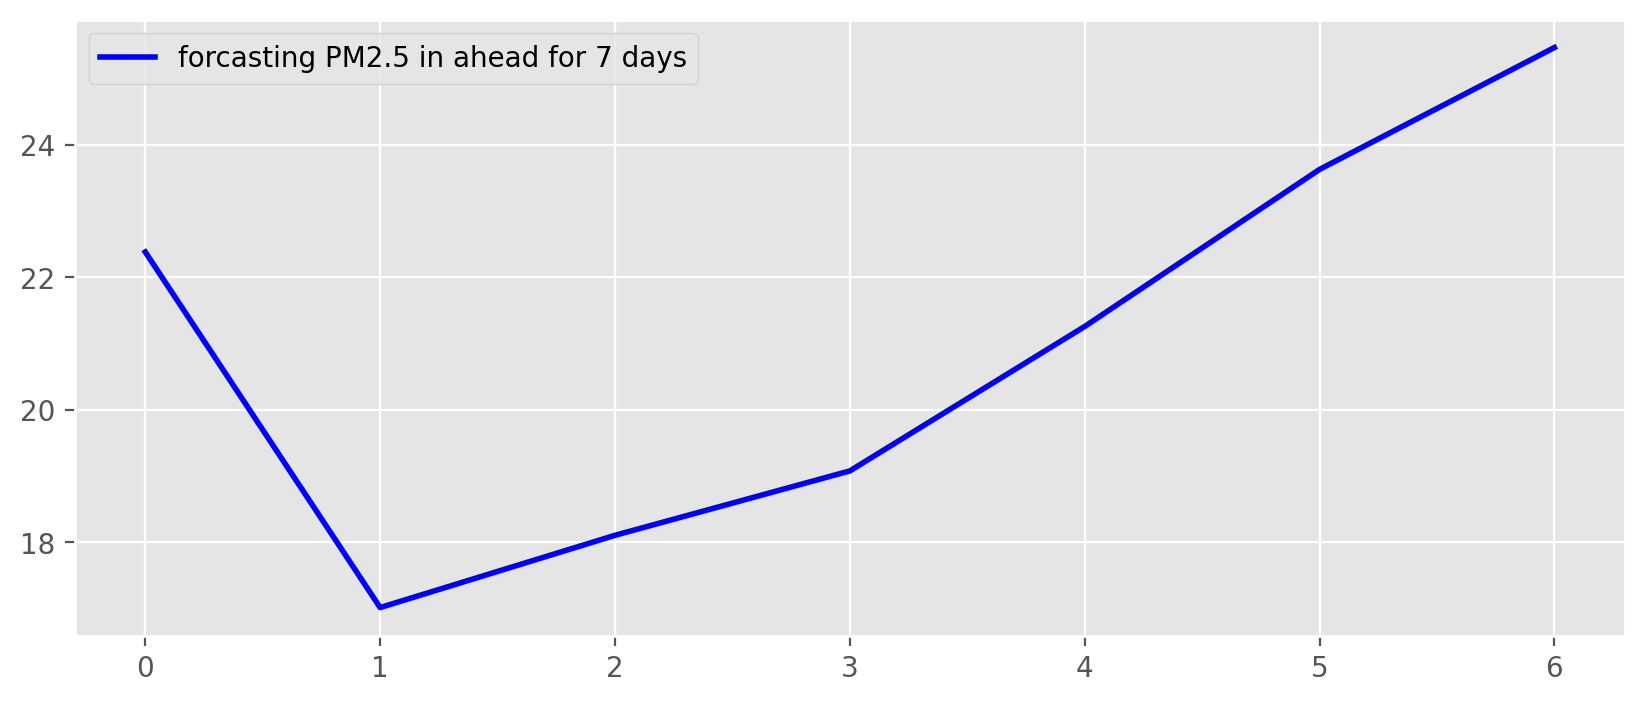

In [278]:
plt.figure(figsize=(10, 4))
plt.plot(yhat, 'b', lw=2.0, label='forcasting PM2.5 in ahead for 7 days')
plt.legend()
plt.show()

In [279]:
predict = pd.DataFrame(yhat)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'})
ypred

พยากรณ์ PM2.5
0      22.381630
1      17.012627
2      18.103418
3      19.075871
4      21.256701
5      23.628389
6      25.468519

In [283]:
predict = pd.DataFrame(yhat)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'}).round(0)
ypred

พยากรณ์ PM2.5
0           22.0
1           17.0
2           18.0
3           19.0
4           21.0
5           24.0
6           25.0

In [284]:
ypred.mean().round(0)

พยากรณ์ PM2.5    21.0
dtype: float32

In [285]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(ypred,yhat)
p_mse = mse2*100
print('MSE',p_mse)
print('RMSE' , np.sqrt(p_mse))

MSE 8.367891609668732
RMSE 2.8927308221935775


In [286]:
#prophet

In [287]:
#import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
%config InlineBackend.figure_format='retina'

#!pip3 install fbprophet
#!pip install fbprophet
#!pip install pystan==2.19.1.1 --quiet
#!pip install fbprophet --quiet
#!pip install fbprophet
!pip install yfinance --quiet
!pip3 install pystan 
!pip install prophet
from prophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [288]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [289]:
from pandas import read_csv
from datetime import datetime
	
df3 = pd.read_csv('/content/drive/MyDrive/code/code/phrakanong/dataAir_phrakanong.csv', usecols=[0,1,2,3,4,5,6,7,8,9,10,11],parse_dates=['date'], skipinitialspace=True)
df3 

date        pm10    co     no   no2    nox  pm25  avgT  humid  \
0    2018-01-01   65.291667  1.33   74.2  45.4  119.5   NaN  27.1     70   
1    2018-01-02   77.041667  1.35   73.0  51.3  124.2   NaN  27.5     67   
2    2018-01-03   96.708333  1.73   98.5  58.0  156.5   NaN  28.2     66   
3    2018-01-04  115.125000  1.76   92.4  62.7  155.2   NaN  29.3     64   
4    2018-01-05  116.625000  1.35   51.1  60.9  111.9   NaN  30.4     63   
...         ...         ...   ...    ...   ...    ...   ...   ...    ...   
1760 2022-10-27   84.000000  1.50  117.6  35.2  152.9  19.0  28.5     79   
1761 2022-10-28   92.000000  1.60  127.1  38.1  165.2  21.0  29.6     72   
1762 2022-10-29   90.000000  1.30   92.0  43.1  135.1  23.0  29.5     62   
1763 2022-10-30   95.000000  1.30   76.9  51.5  128.4  32.0  30.0     62   
1764 2022-10-31   88.000000  1.60   86.9  58.1  145.0  40.0   NaN     59   

      pressure-monthly  windDir  windSpd  
0              1009.40    100.0      9.0  
1              1009.40    120.0      4.0  
2              1009.40     60.0      4.0  
3              1009.40    330.0      6.0  
4              1009.40      NaN      NaN  
...                ...      ...      ...  
1760           1009.24    120.0      9.0  
1761           1009.24    170.0      7.0  
1762           1009.24    120.0     13.0  
1763           1009.24    120.0     13.0  
1764           1009.24      NaN      NaN  

[1765 rows x 12 columns]

In [290]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1765 non-null   datetime64[ns]
 1   pm10              1721 non-null   float64       
 2   co                1737 non-null   float64       
 3   no                1739 non-null   float64       
 4   no2               1739 non-null   float64       
 5   nox               1738 non-null   float64       
 6   pm25              1016 non-null   float64       
 7   avgT              1695 non-null   float64       
 8   humid             1765 non-null   int64         
 9   pressure-monthly  1765 non-null   float64       
 10  windDir           1735 non-null   float64       
 11  windSpd           1737 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 165.6 KB


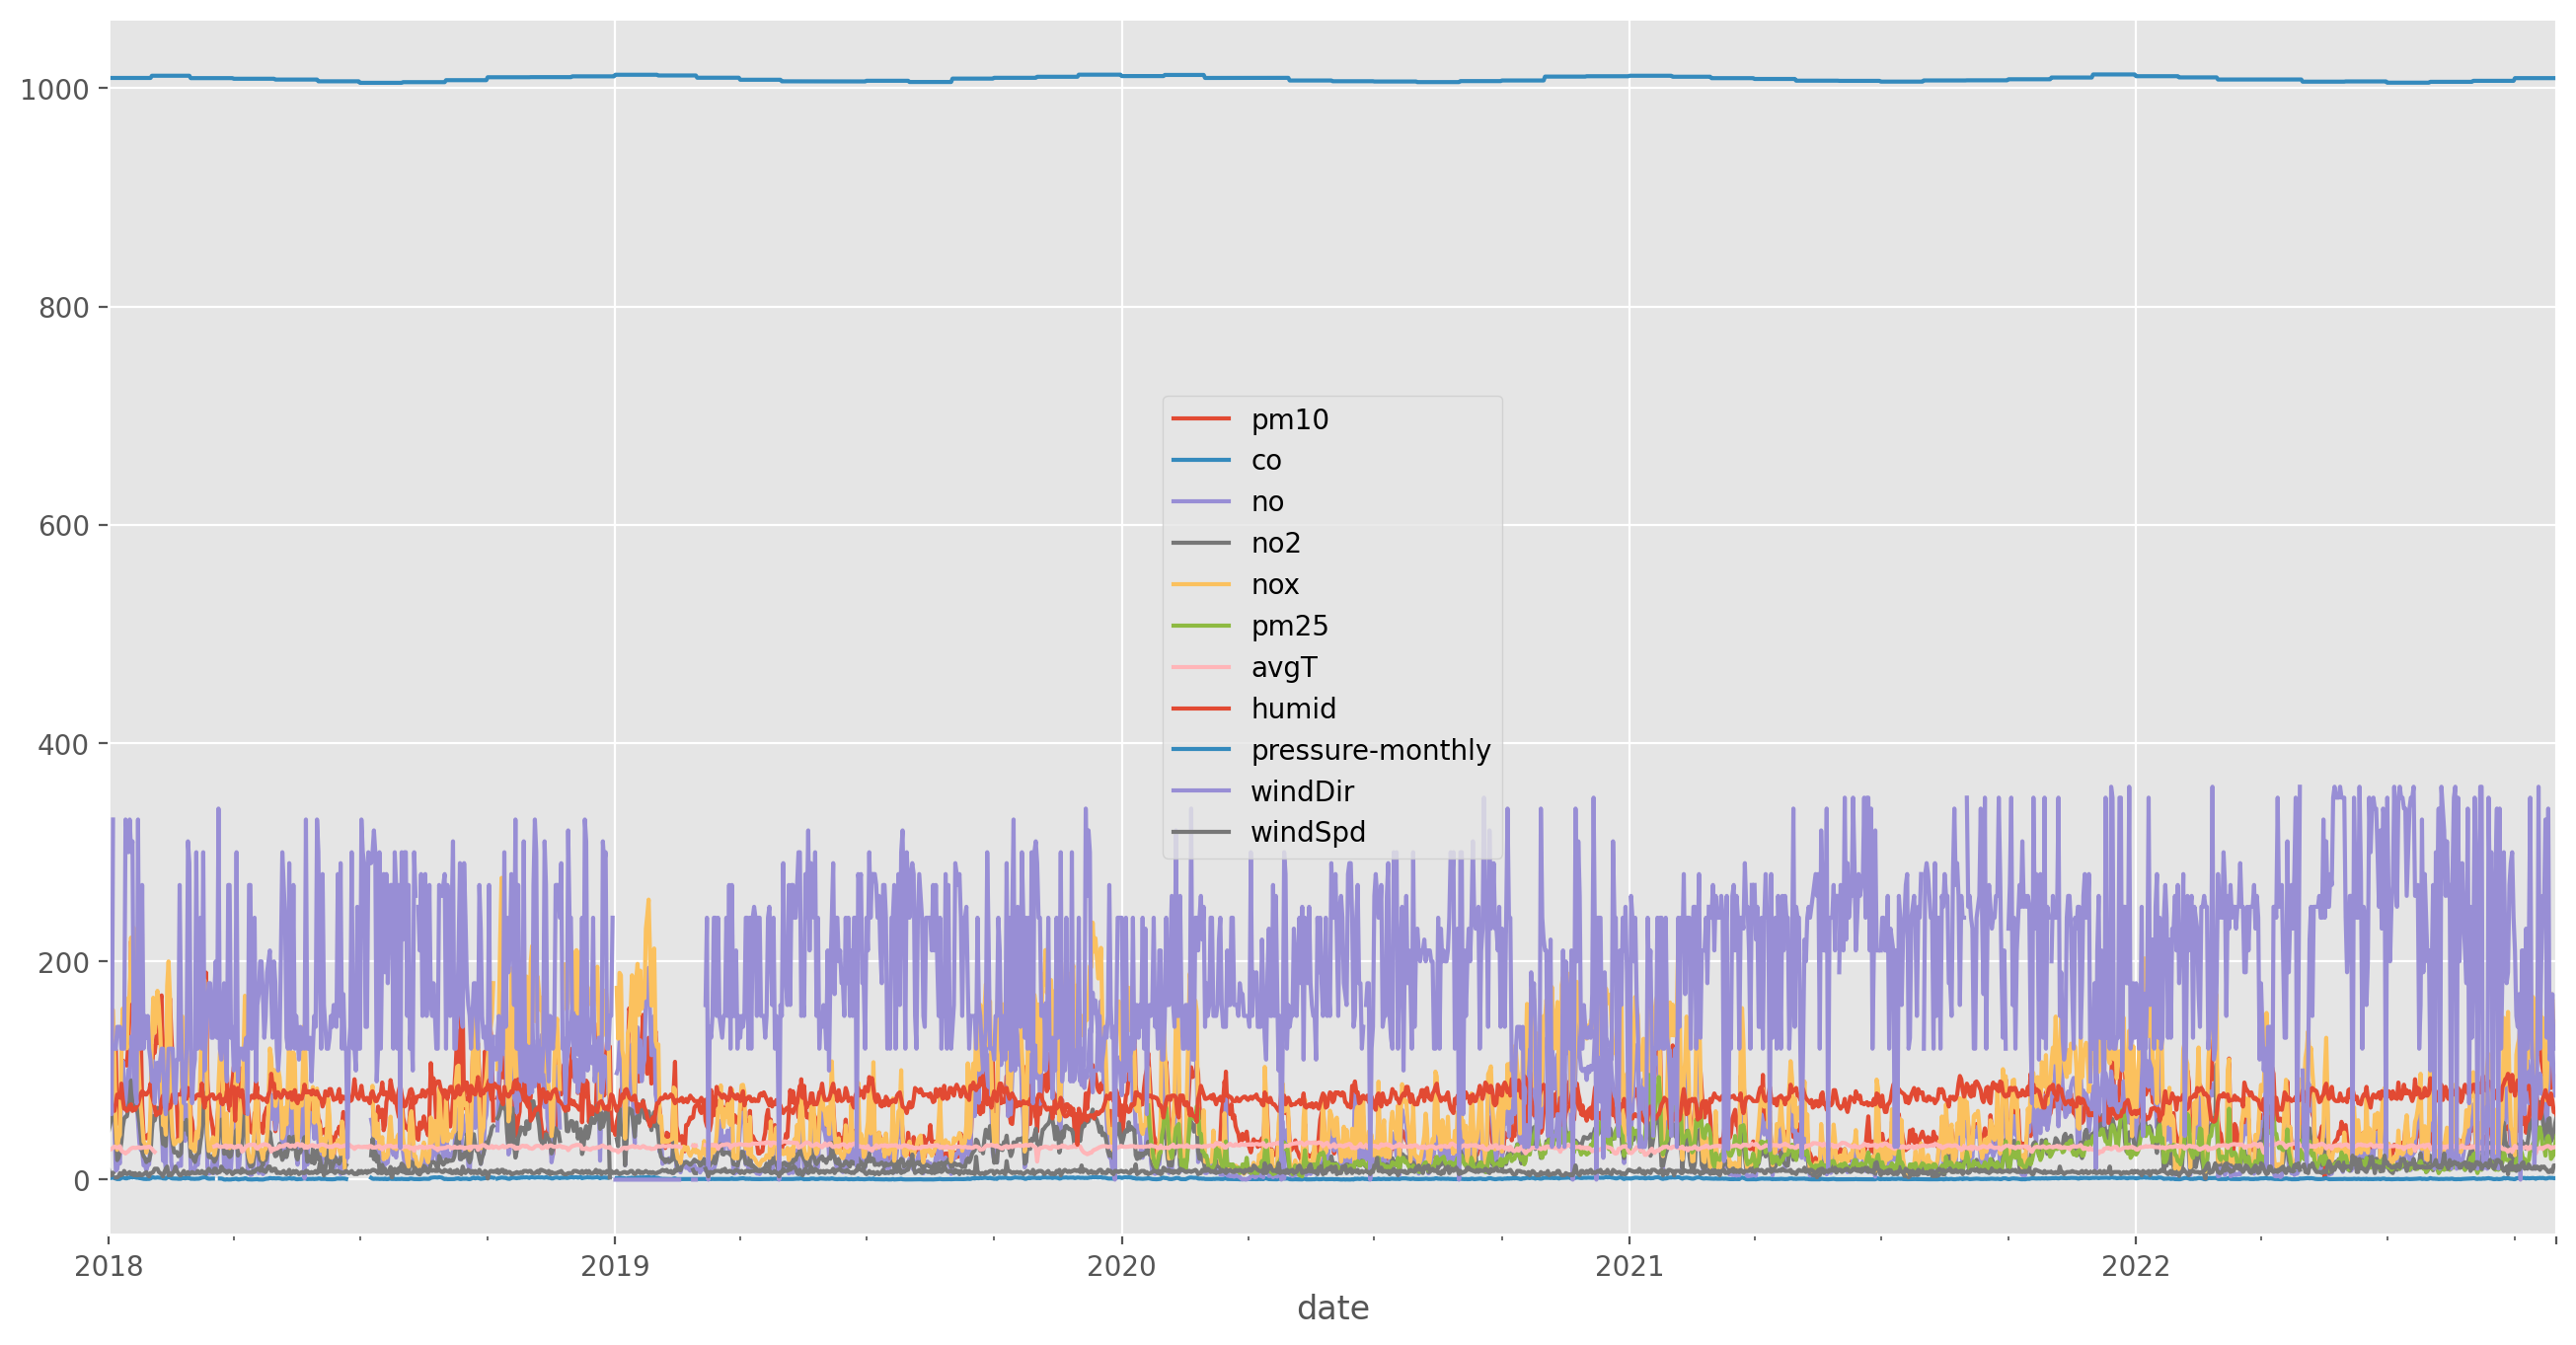

In [291]:
df3.set_index('date').plot(figsize=(16, 8));

In [292]:
data3 = df3.sort_values('date').reset_index(drop=True).copy()
data3

date        pm10    co     no   no2    nox  pm25  avgT  humid  \
0    2018-01-01   65.291667  1.33   74.2  45.4  119.5   NaN  27.1     70   
1    2018-01-02   77.041667  1.35   73.0  51.3  124.2   NaN  27.5     67   
2    2018-01-03   96.708333  1.73   98.5  58.0  156.5   NaN  28.2     66   
3    2018-01-04  115.125000  1.76   92.4  62.7  155.2   NaN  29.3     64   
4    2018-01-05  116.625000  1.35   51.1  60.9  111.9   NaN  30.4     63   
...         ...         ...   ...    ...   ...    ...   ...   ...    ...   
1760 2022-10-27   84.000000  1.50  117.6  35.2  152.9  19.0  28.5     79   
1761 2022-10-28   92.000000  1.60  127.1  38.1  165.2  21.0  29.6     72   
1762 2022-10-29   90.000000  1.30   92.0  43.1  135.1  23.0  29.5     62   
1763 2022-10-30   95.000000  1.30   76.9  51.5  128.4  32.0  30.0     62   
1764 2022-10-31   88.000000  1.60   86.9  58.1  145.0  40.0   NaN     59   

      pressure-monthly  windDir  windSpd  
0              1009.40    100.0      9.0  
1              1009.40    120.0      4.0  
2              1009.40     60.0      4.0  
3              1009.40    330.0      6.0  
4              1009.40      NaN      NaN  
...                ...      ...      ...  
1760           1009.24    120.0      9.0  
1761           1009.24    170.0      7.0  
1762           1009.24    120.0     13.0  
1763           1009.24    120.0     13.0  
1764           1009.24      NaN      NaN  

[1765 rows x 12 columns]

In [293]:
y_col = 'pm25'

In [294]:
data3.dropna(subset=[y_col], inplace=True)
data3

date   pm10    co     no   no2    nox  pm25  avgT  humid  \
742  2020-01-13   70.0  1.04   49.7  24.4   74.1  42.0  30.1     77   
749  2020-01-20  116.0  1.36   68.2  34.7  102.9  68.0  30.6     76   
750  2020-01-21   95.0  1.06   47.3  22.9   70.2  49.0  30.3     77   
751  2020-01-22   74.0  0.74   16.6  26.3   42.8  36.0  31.6     77   
752  2020-01-23   57.0  0.55    6.5  14.1   20.6  29.0  30.8     75   
...         ...    ...   ...    ...   ...    ...   ...   ...    ...   
1760 2022-10-27   84.0  1.50  117.6  35.2  152.9  19.0  28.5     79   
1761 2022-10-28   92.0  1.60  127.1  38.1  165.2  21.0  29.6     72   
1762 2022-10-29   90.0  1.30   92.0  43.1  135.1  23.0  29.5     62   
1763 2022-10-30   95.0  1.30   76.9  51.5  128.4  32.0  30.0     62   
1764 2022-10-31   88.0  1.60   86.9  58.1  145.0  40.0   NaN     59   

      pressure-monthly  windDir  windSpd  
742            1011.12    130.0      6.0  
749            1011.12    150.0      5.0  
750            1011.12    160.0      6.0  
751            1011.12    150.0      6.0  
752            1011.12    160.0      7.0  
...                ...      ...      ...  
1760           1009.24    120.0      9.0  
1761           1009.24    170.0      7.0  
1762           1009.24    120.0     13.0  
1763           1009.24    120.0     13.0  
1764           1009.24      NaN      NaN  

[1016 rows x 12 columns]

In [295]:
df3 = data3[['date', y_col]]
df3.columns=['ds', 'y']
df3

ds     y
742  2020-01-13  42.0
749  2020-01-20  68.0
750  2020-01-21  49.0
751  2020-01-22  36.0
752  2020-01-23  29.0
...         ...   ...
1760 2022-10-27  19.0
1761 2022-10-28  21.0
1762 2022-10-29  23.0
1763 2022-10-30  32.0
1764 2022-10-31  40.0

[1016 rows x 2 columns]

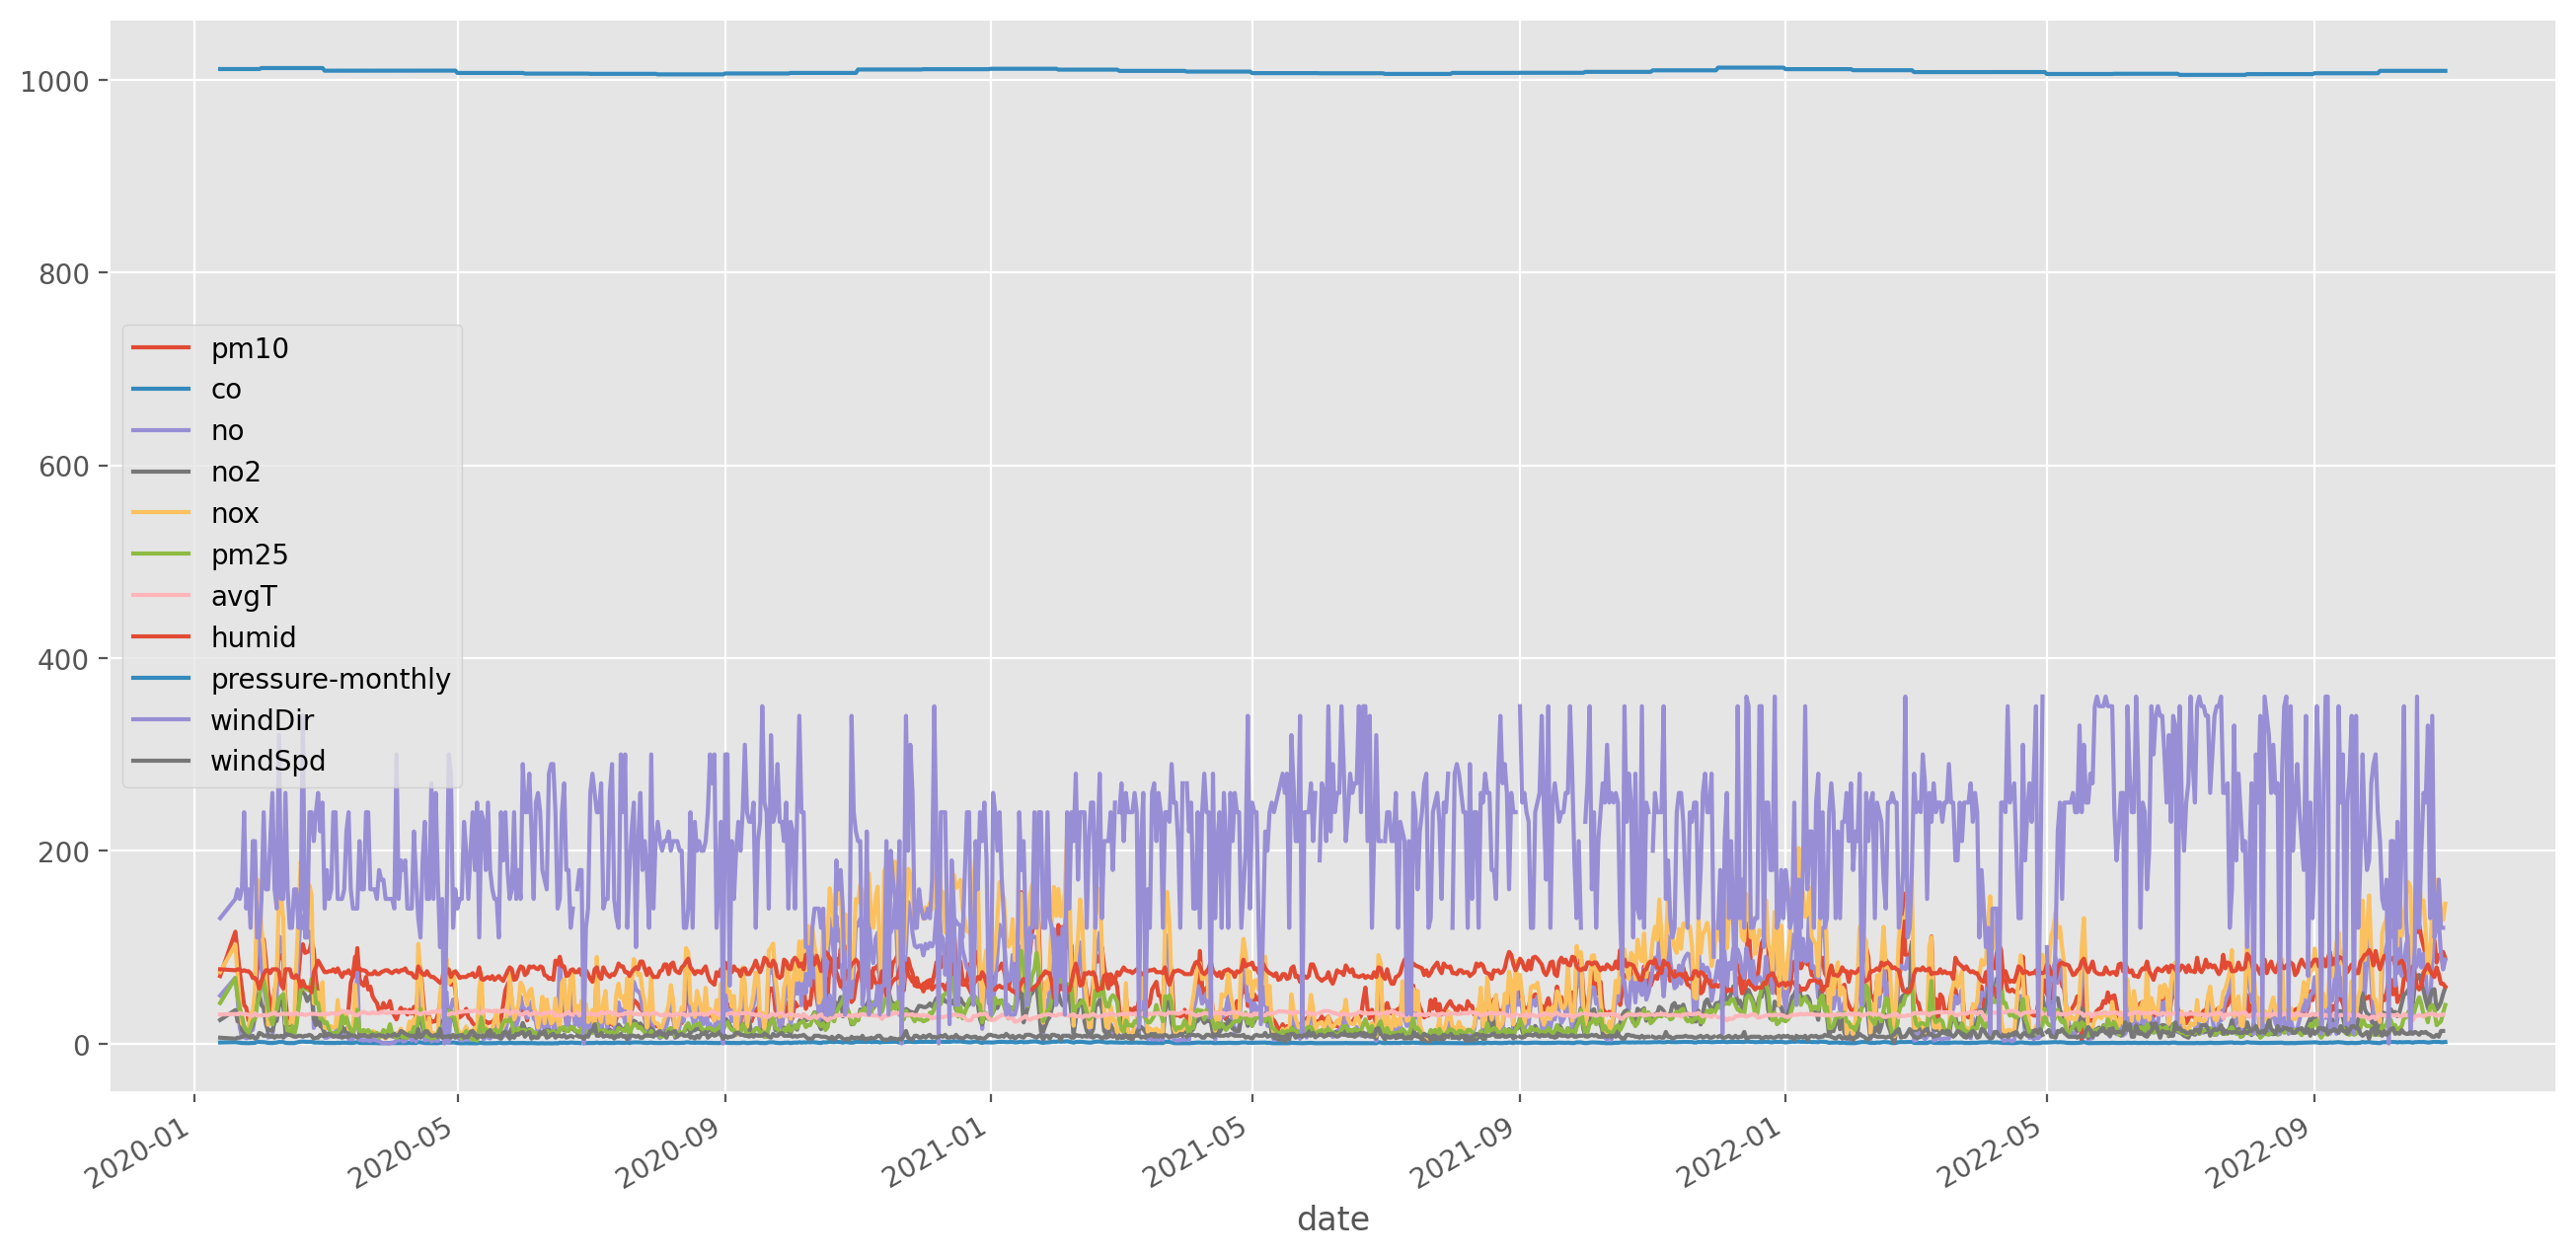

In [296]:
data3.set_index('date').plot(figsize=(16, 8));

In [297]:
model=Prophet()

In [298]:
model.__dict__

{'growth': 'linear',
 'changepoints': None,
 'n_changepoints': 25,
 'specified_changepoints': False,
 'changepoint_range': 0.8,
 'yearly_seasonality': 'auto',
 'weekly_seasonality': 'auto',
 'daily_seasonality': 'auto',
 'holidays': None,
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 10.0,
 'changepoint_prior_scale': 0.05,
 'holidays_prior_scale': 10.0,
 'mcmc_samples': 0,
 'interval_width': 0.8,
 'uncertainty_samples': 1000,
 'start': None,
 'y_scale': None,
 'logistic_floor': False,
 't_scale': None,
 'changepoints_t': None,
 'seasonalities': OrderedDict(),
 'extra_regressors': OrderedDict(),
 'country_holidays': None,
 'stan_fit': None,
 'params': {},
 'history': None,
 'history_dates': None,
 'train_component_cols': None,
 'component_modes': None,
 'train_holiday_names': None,
 'fit_kwargs': {},
 'stan_backend': <prophet.models.CmdStanPyBackend at 0x7ff3360210a0>}

In [299]:
model.fit(df3)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfvfu1bf/lqjoqaff.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfvfu1bf/2ypxdsff.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54184', 'data', 'file=/tmp/tmpcfvfu1bf/lqjoqaff.json', 'init=/tmp/tmpcfvfu1bf/2ypxdsff.json', 'output', 'file=/tmp/tmpcfvfu1bf/prophet_model49ed1of7/prophet_model-20230402090726.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:07:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:07:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [300]:
df3.tail()

ds     y
1760 2022-10-27  19.0
1761 2022-10-28  21.0
1762 2022-10-29  23.0
1763 2022-10-30  32.0
1764 2022-10-31  40.0

In [301]:
future = model.make_future_dataframe(periods=180, freq='D')
future.tail()

ds
1191 2023-04-25
1192 2023-04-26
1193 2023-04-27
1194 2023-04-28
1195 2023-04-29

In [302]:
future.head()

ds
0 2020-01-13
1 2020-01-20
2 2020-01-21
3 2020-01-22
4 2020-01-23

In [303]:
ypred.mean().round(0)

พยากรณ์ PM2.5    21.0
dtype: float32

In [304]:
forecast = model.predict(future)

In [305]:
df3

ds     y
742  2020-01-13  42.0
749  2020-01-20  68.0
750  2020-01-21  49.0
751  2020-01-22  36.0
752  2020-01-23  29.0
...         ...   ...
1760 2022-10-27  19.0
1761 2022-10-28  21.0
1762 2022-10-29  23.0
1763 2022-10-30  32.0
1764 2022-10-31  40.0

[1016 rows x 2 columns]

In [306]:
dfcst=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dfcst

ds       yhat  yhat_lower  yhat_upper
0    2020-01-13  36.854569   25.578830   48.573500
1    2020-01-20  38.989843   27.085595   51.336410
2    2020-01-21  39.520890   27.655578   51.873618
3    2020-01-22  39.518348   26.623922   52.186815
4    2020-01-23  38.426145   25.519623   49.924556
...         ...        ...         ...         ...
1191 2023-04-25  24.624728   12.152973   36.371562
1192 2023-04-26  24.478293   13.000704   37.043303
1193 2023-04-27  23.350348   11.935769   34.846486
1194 2023-04-28  22.860559   10.280119   34.794620
1195 2023-04-29  22.206963    9.980134   33.841422

[1196 rows x 4 columns]

In [79]:
dt=pd.merge(df3, dfcst, left_on='ds', right_on='ds')
dt

ds     y       yhat  yhat_lower  yhat_upper
0    2020-01-13  42.0  36.854569   24.871017   48.205862
1    2020-01-20  68.0  38.989843   27.656226   50.552521
2    2020-01-21  49.0  39.520890   26.841523   52.175370
3    2020-01-22  36.0  39.518348   27.205116   51.177554
4    2020-01-23  29.0  38.426145   26.646614   49.902868
...         ...   ...        ...         ...         ...
1011 2022-10-27  19.0  31.697743   19.126683   43.940739
1012 2022-10-28  21.0  31.980425   20.312594   43.945625
1013 2022-10-29  23.0  32.017265   20.157810   43.151399
1014 2022-10-30  32.0  31.538161   19.947047   43.232059
1015 2022-10-31  40.0  33.766338   22.220530   46.502307

[1016 rows x 5 columns]

In [307]:
dt.shape

(1016, 5)

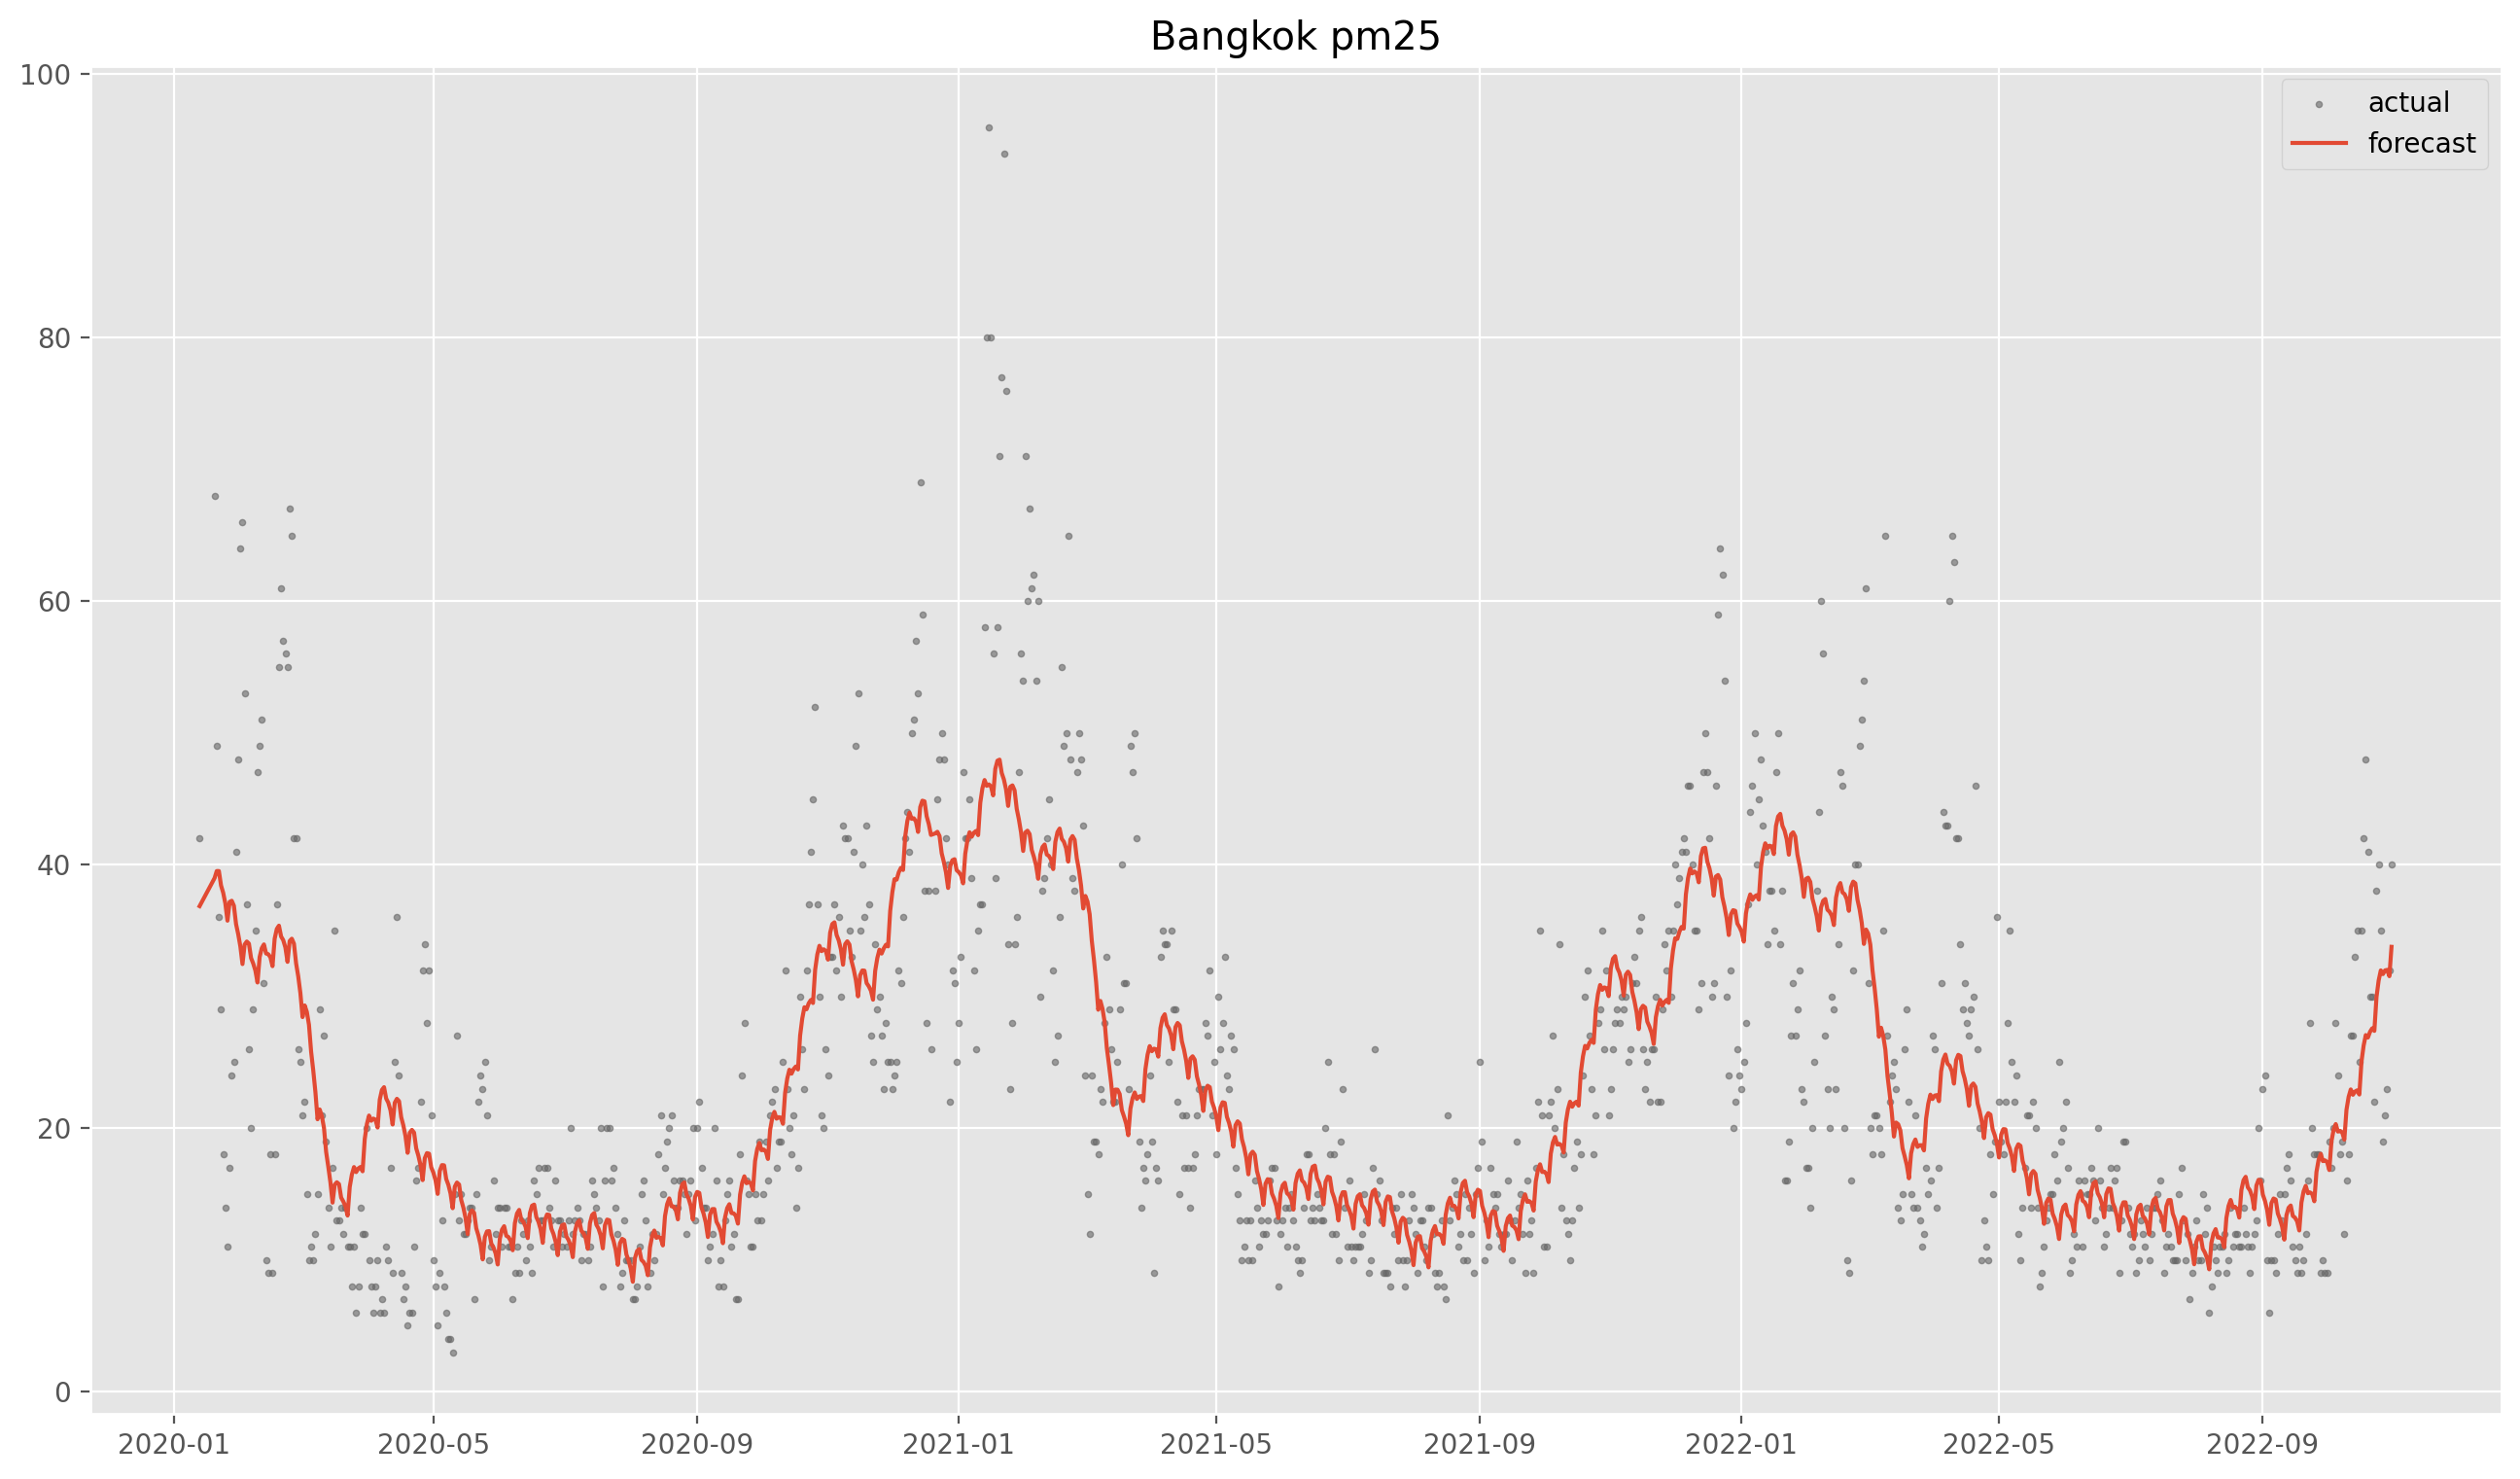

In [308]:
plt.figure(figsize=(16,9))
plt.scatter(dt['ds'], dt['y'], color='.4', label='actual', s=5, alpha=.6)
plt.plot(dt['ds'], dt['yhat'], label='forecast')
plt.title(f'Bangkok {y_col}')
plt.legend();

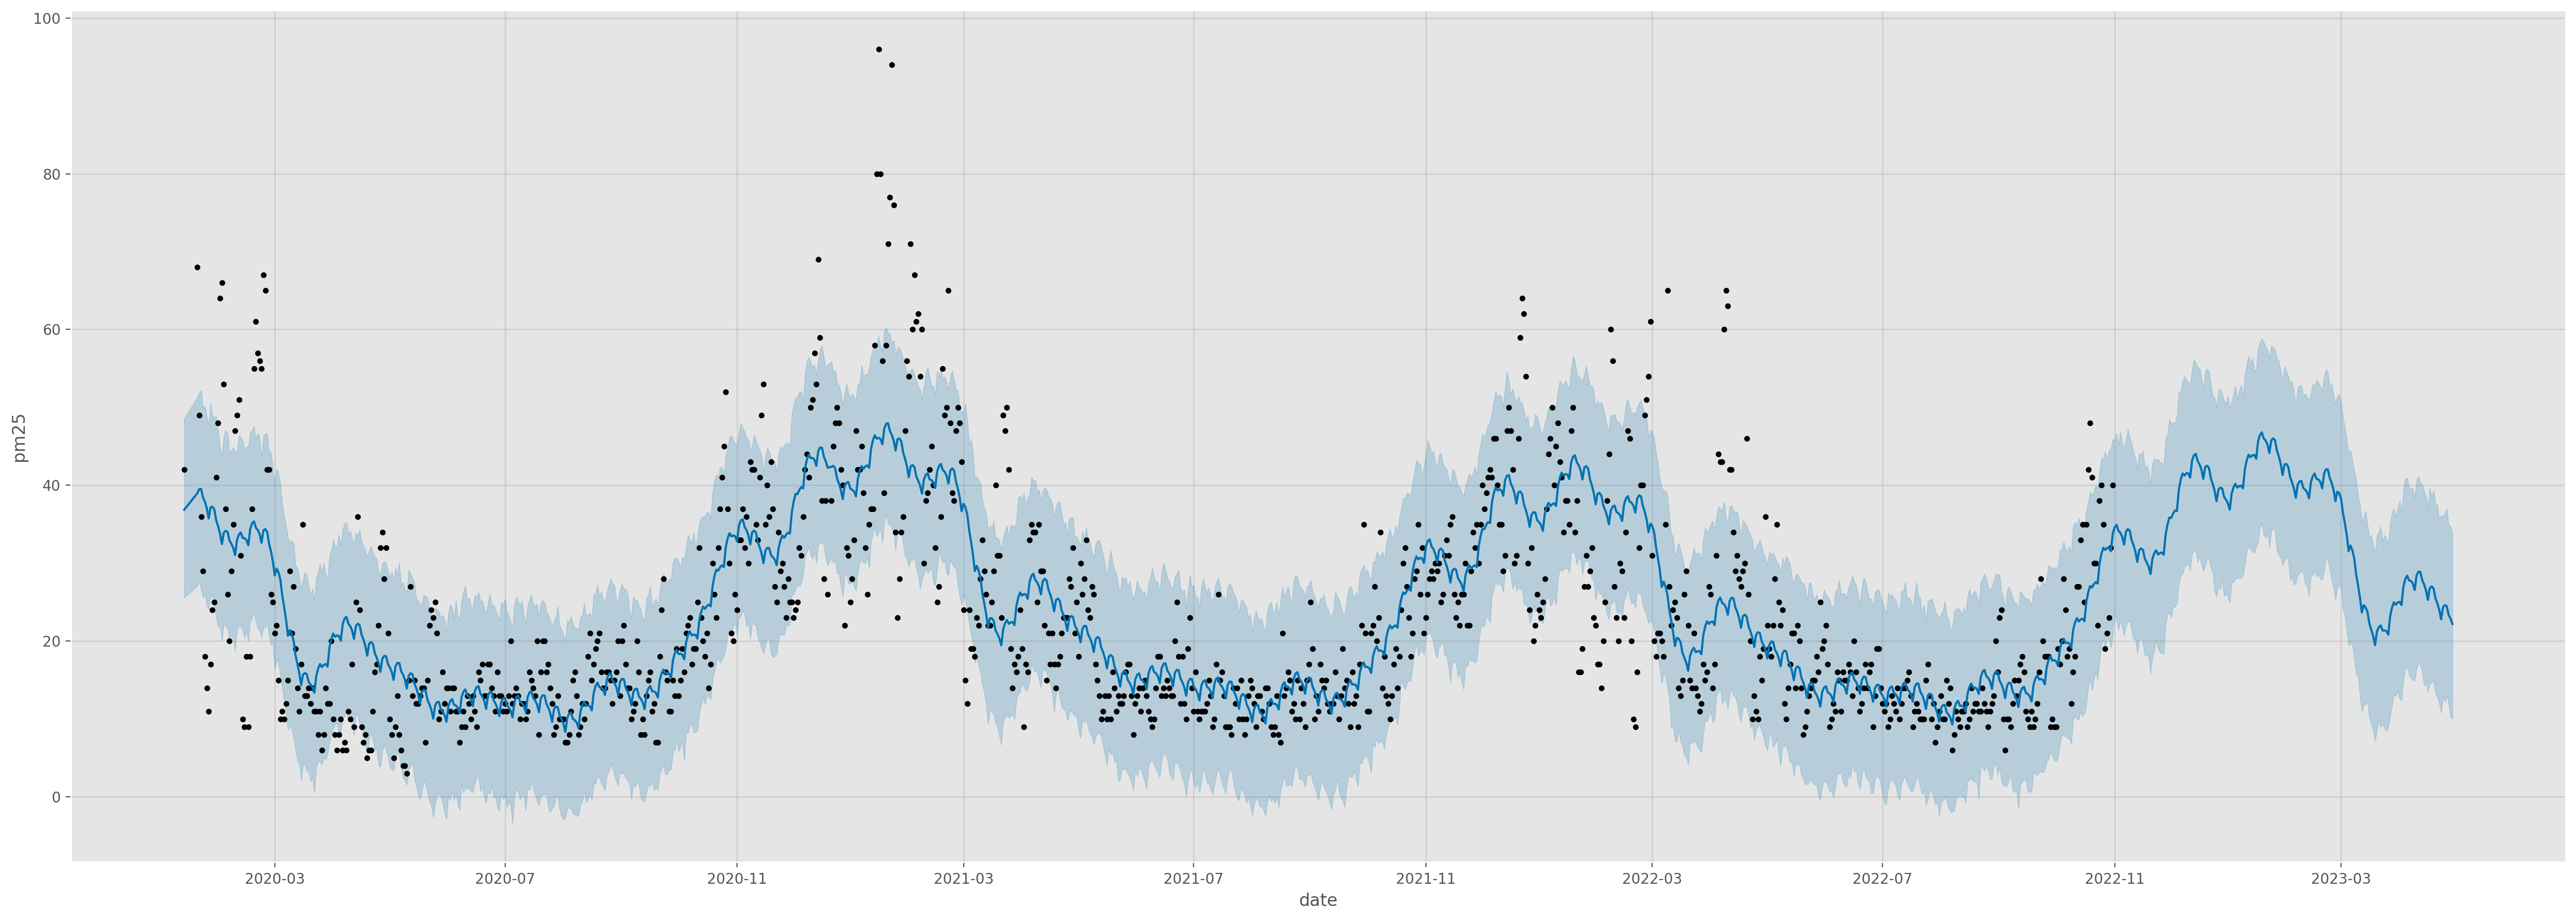

In [309]:
fig=model.plot(forecast, uncertainty=True, figsize=(25, 9), xlabel='date', ylabel=y_col)

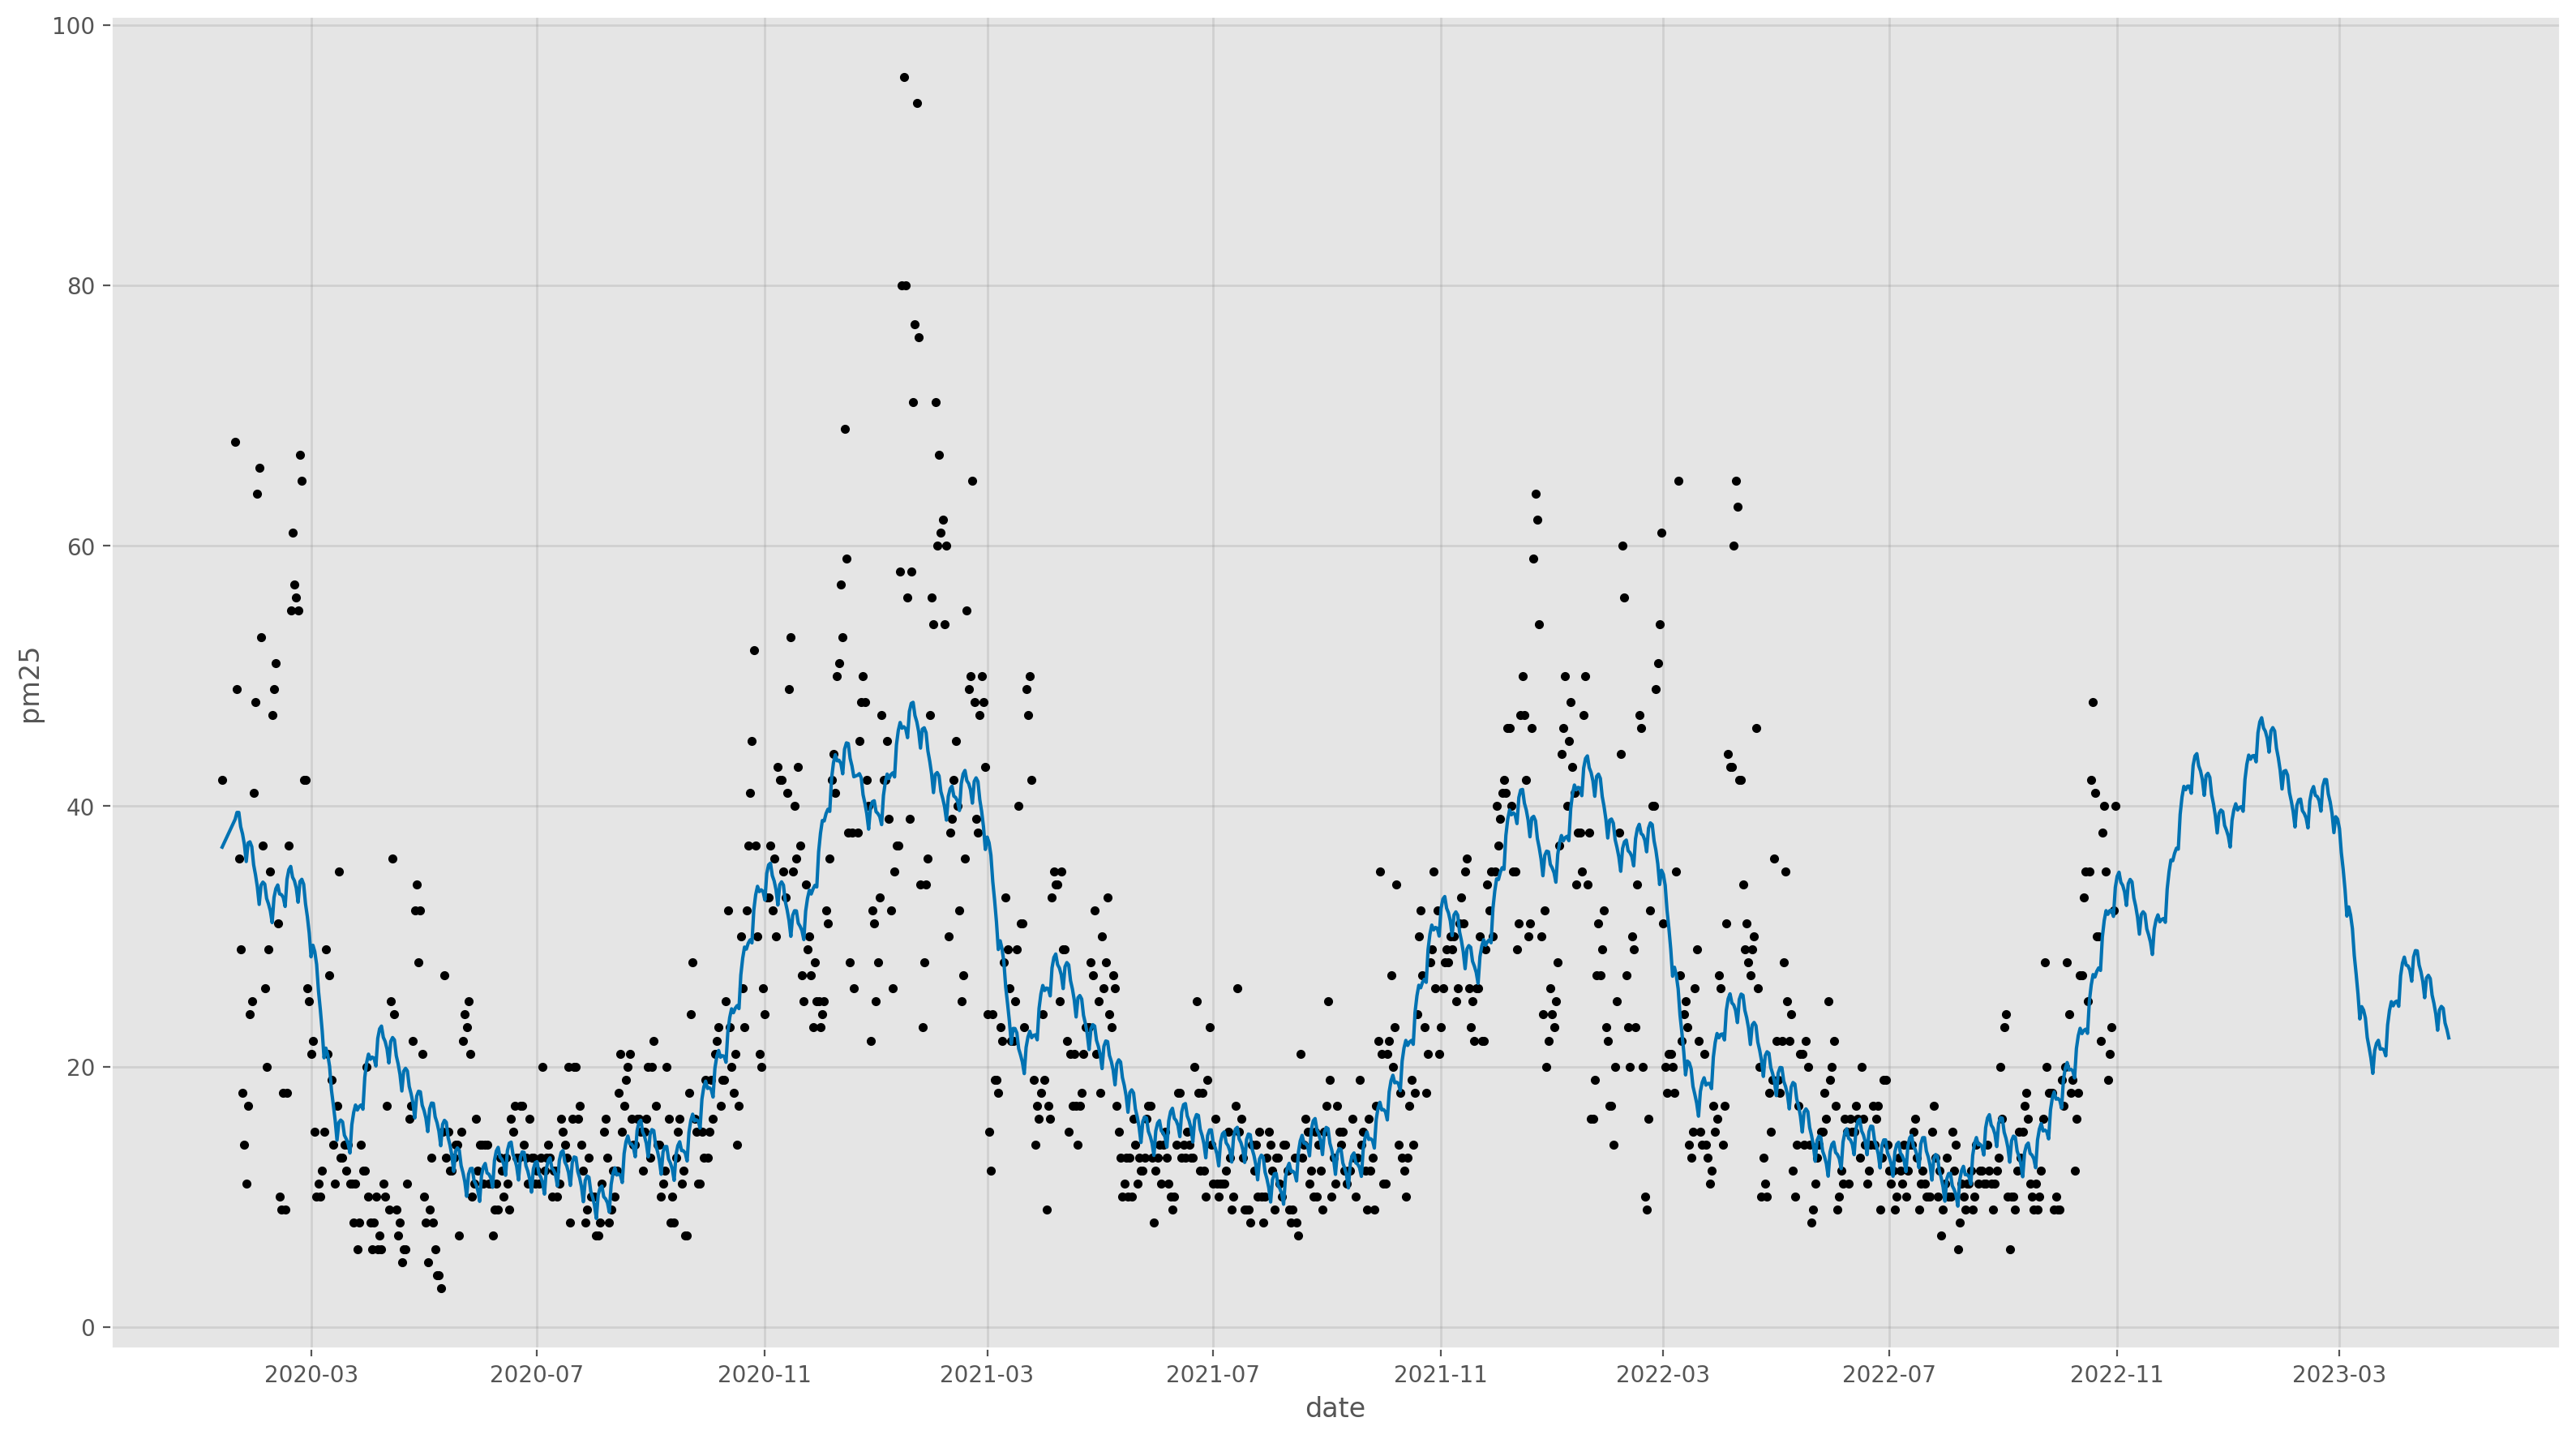

In [310]:
fig=model.plot(forecast, uncertainty=False, figsize=(16, 9), xlabel='date', ylabel=y_col)

In [311]:
dfcstnew = forecast.tail(180)

In [312]:
dfcstt = dfcstnew[['ds', 'yhat']]
ypred = dfcstt.rename(columns={1:'yhat'})
ypred

ds       yhat
1016 2022-11-01  34.611701
1017 2022-11-02  34.929523
1018 2022-11-03  34.157530
1019 2022-11-04  33.916845
1020 2022-11-05  33.409960
...         ...        ...
1191 2023-04-25  24.624728
1192 2023-04-26  24.478293
1193 2023-04-27  23.350348
1194 2023-04-28  22.860559
1195 2023-04-29  22.206963

[180 rows x 2 columns]

In [313]:
dfcstt = dfcstnew[['ds', 'yhat']]
ypred = dfcstt.rename(columns={1:'yhat'}).round(0)
ypred

ds  yhat
1016 2022-11-01  35.0
1017 2022-11-02  35.0
1018 2022-11-03  34.0
1019 2022-11-04  34.0
1020 2022-11-05  33.0
...         ...   ...
1191 2023-04-25  25.0
1192 2023-04-26  24.0
1193 2023-04-27  23.0
1194 2023-04-28  23.0
1195 2023-04-29  22.0

[180 rows x 2 columns]

In [314]:
ypred.mean().round(0)

yhat    35.0
dtype: float64

In [315]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [316]:
metric_df = forecast.set_index('ds')[['yhat']].join(df3.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)

In [317]:
mse3 = mean_squared_error(metric_df.y, metric_df.yhat) #mse
mse3

89.4409952956145

In [318]:
import math
#mse = np.square(np.subtract(metric_df.y,metric_df.yhat)).mean() 
mse3 = mean_squared_error(metric_df.y, metric_df.yhat)
ans = math.sqrt(mse3) 
ans

9.457324954532043

In [319]:
#Xgboost

In [320]:
import sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [321]:
print(f'Python  version: {sys.version}')
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')

Python  version: 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
pandas  version: 1.4.4
numpy   version: 1.22.4


In [322]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [323]:
data = pd.read_csv('/content/drive/MyDrive/code/code/phrakanong/dataAir_phrakanong.csv',usecols=[0,1,2,3,4,5,6,7,8,9,10,11],parse_dates=['date'], skipinitialspace=True)
data

date        pm10    co     no   no2    nox  pm25  avgT  humid  \
0    2018-01-01   65.291667  1.33   74.2  45.4  119.5   NaN  27.1     70   
1    2018-01-02   77.041667  1.35   73.0  51.3  124.2   NaN  27.5     67   
2    2018-01-03   96.708333  1.73   98.5  58.0  156.5   NaN  28.2     66   
3    2018-01-04  115.125000  1.76   92.4  62.7  155.2   NaN  29.3     64   
4    2018-01-05  116.625000  1.35   51.1  60.9  111.9   NaN  30.4     63   
...         ...         ...   ...    ...   ...    ...   ...   ...    ...   
1760 2022-10-27   84.000000  1.50  117.6  35.2  152.9  19.0  28.5     79   
1761 2022-10-28   92.000000  1.60  127.1  38.1  165.2  21.0  29.6     72   
1762 2022-10-29   90.000000  1.30   92.0  43.1  135.1  23.0  29.5     62   
1763 2022-10-30   95.000000  1.30   76.9  51.5  128.4  32.0  30.0     62   
1764 2022-10-31   88.000000  1.60   86.9  58.1  145.0  40.0   NaN     59   

      pressure-monthly  windDir  windSpd  
0              1009.40    100.0      9.0  
1              1009.40    120.0      4.0  
2              1009.40     60.0      4.0  
3              1009.40    330.0      6.0  
4              1009.40      NaN      NaN  
...                ...      ...      ...  
1760           1009.24    120.0      9.0  
1761           1009.24    170.0      7.0  
1762           1009.24    120.0     13.0  
1763           1009.24    120.0     13.0  
1764           1009.24      NaN      NaN  

[1765 rows x 12 columns]

In [324]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1765 non-null   datetime64[ns]
 1   pm10              1721 non-null   float64       
 2   co                1737 non-null   float64       
 3   no                1739 non-null   float64       
 4   no2               1739 non-null   float64       
 5   nox               1738 non-null   float64       
 6   pm25              1016 non-null   float64       
 7   avgT              1695 non-null   float64       
 8   humid             1765 non-null   int64         
 9   pressure-monthly  1765 non-null   float64       
 10  windDir           1735 non-null   float64       
 11  windSpd           1737 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 165.6 KB


In [325]:
data=data.sort_values('date').reset_index(drop=True).copy()
data

date        pm10    co     no   no2    nox  pm25  avgT  humid  \
0    2018-01-01   65.291667  1.33   74.2  45.4  119.5   NaN  27.1     70   
1    2018-01-02   77.041667  1.35   73.0  51.3  124.2   NaN  27.5     67   
2    2018-01-03   96.708333  1.73   98.5  58.0  156.5   NaN  28.2     66   
3    2018-01-04  115.125000  1.76   92.4  62.7  155.2   NaN  29.3     64   
4    2018-01-05  116.625000  1.35   51.1  60.9  111.9   NaN  30.4     63   
...         ...         ...   ...    ...   ...    ...   ...   ...    ...   
1760 2022-10-27   84.000000  1.50  117.6  35.2  152.9  19.0  28.5     79   
1761 2022-10-28   92.000000  1.60  127.1  38.1  165.2  21.0  29.6     72   
1762 2022-10-29   90.000000  1.30   92.0  43.1  135.1  23.0  29.5     62   
1763 2022-10-30   95.000000  1.30   76.9  51.5  128.4  32.0  30.0     62   
1764 2022-10-31   88.000000  1.60   86.9  58.1  145.0  40.0   NaN     59   

      pressure-monthly  windDir  windSpd  
0              1009.40    100.0      9.0  
1              1009.40    120.0      4.0  
2              1009.40     60.0      4.0  
3              1009.40    330.0      6.0  
4              1009.40      NaN      NaN  
...                ...      ...      ...  
1760           1009.24    120.0      9.0  
1761           1009.24    170.0      7.0  
1762           1009.24    120.0     13.0  
1763           1009.24    120.0     13.0  
1764           1009.24      NaN      NaN  

[1765 rows x 12 columns]

In [326]:
y_col='pm25'

In [327]:
data.dropna(subset=[y_col], inplace=True)
data=data.reset_index(drop=True)
data

date   pm10    co     no   no2    nox  pm25  avgT  humid  \
0    2020-01-13   70.0  1.04   49.7  24.4   74.1  42.0  30.1     77   
1    2020-01-20  116.0  1.36   68.2  34.7  102.9  68.0  30.6     76   
2    2020-01-21   95.0  1.06   47.3  22.9   70.2  49.0  30.3     77   
3    2020-01-22   74.0  0.74   16.6  26.3   42.8  36.0  31.6     77   
4    2020-01-23   57.0  0.55    6.5  14.1   20.6  29.0  30.8     75   
...         ...    ...   ...    ...   ...    ...   ...   ...    ...   
1011 2022-10-27   84.0  1.50  117.6  35.2  152.9  19.0  28.5     79   
1012 2022-10-28   92.0  1.60  127.1  38.1  165.2  21.0  29.6     72   
1013 2022-10-29   90.0  1.30   92.0  43.1  135.1  23.0  29.5     62   
1014 2022-10-30   95.0  1.30   76.9  51.5  128.4  32.0  30.0     62   
1015 2022-10-31   88.0  1.60   86.9  58.1  145.0  40.0   NaN     59   

      pressure-monthly  windDir  windSpd  
0              1011.12    130.0      6.0  
1              1011.12    150.0      5.0  
2              1011.12    160.0      6.0  
3              1011.12    150.0      6.0  
4              1011.12    160.0      7.0  
...                ...      ...      ...  
1011           1009.24    120.0      9.0  
1012           1009.24    170.0      7.0  
1013           1009.24    120.0     13.0  
1014           1009.24    120.0     13.0  
1015           1009.24      NaN      NaN  

[1016 rows x 12 columns]

In [328]:
def date_parts(data, date_colname='date'):
    '''create year, month, day, dayname columns'''
    data['year']=data['date'].dt.year
    data['month']=data['date'].dt.month
    data['day']=data['date'].dt.day
    data['day_name']=data['date'].dt.day_name().astype('category')

In [329]:
date_parts(data)

In [330]:
data

date   pm10    co     no   no2    nox  pm25  avgT  humid  \
0    2020-01-13   70.0  1.04   49.7  24.4   74.1  42.0  30.1     77   
1    2020-01-20  116.0  1.36   68.2  34.7  102.9  68.0  30.6     76   
2    2020-01-21   95.0  1.06   47.3  22.9   70.2  49.0  30.3     77   
3    2020-01-22   74.0  0.74   16.6  26.3   42.8  36.0  31.6     77   
4    2020-01-23   57.0  0.55    6.5  14.1   20.6  29.0  30.8     75   
...         ...    ...   ...    ...   ...    ...   ...   ...    ...   
1011 2022-10-27   84.0  1.50  117.6  35.2  152.9  19.0  28.5     79   
1012 2022-10-28   92.0  1.60  127.1  38.1  165.2  21.0  29.6     72   
1013 2022-10-29   90.0  1.30   92.0  43.1  135.1  23.0  29.5     62   
1014 2022-10-30   95.0  1.30   76.9  51.5  128.4  32.0  30.0     62   
1015 2022-10-31   88.0  1.60   86.9  58.1  145.0  40.0   NaN     59   

      pressure-monthly  windDir  windSpd  year  month  day   day_name  
0              1011.12    130.0      6.0  2020      1   13     Monday  
1              1011.12    150.0      5.0  2020      1   20     Monday  
2              1011.12    160.0      6.0  2020      1   21    Tuesday  
3              1011.12    150.0      6.0  2020      1   22  Wednesday  
4              1011.12    160.0      7.0  2020      1   23   Thursday  
...                ...      ...      ...   ...    ...  ...        ...  
1011           1009.24    120.0      9.0  2022     10   27   Thursday  
1012           1009.24    170.0      7.0  2022     10   28     Friday  
1013           1009.24    120.0     13.0  2022     10   29   Saturday  
1014           1009.24    120.0     13.0  2022     10   30     Sunday  
1015           1009.24      NaN      NaN  2022     10   31     Monday  

[1016 rows x 16 columns]

In [331]:
data.columns

Index(['date', 'pm10', 'co', 'no', 'no2', 'nox', 'pm25', 'avgT', 'humid',
       'pressure-monthly', 'windDir', 'windSpd', 'year', 'month', 'day',
       'day_name'],
      dtype='object')

In [332]:
df=data[['date', 'year', 'month', 'day', 'day_name', y_col]]
df

date  year  month  day   day_name  pm25
0    2020-01-13  2020      1   13     Monday  42.0
1    2020-01-20  2020      1   20     Monday  68.0
2    2020-01-21  2020      1   21    Tuesday  49.0
3    2020-01-22  2020      1   22  Wednesday  36.0
4    2020-01-23  2020      1   23   Thursday  29.0
...         ...   ...    ...  ...        ...   ...
1011 2022-10-27  2022     10   27   Thursday  19.0
1012 2022-10-28  2022     10   28     Friday  21.0
1013 2022-10-29  2022     10   29   Saturday  23.0
1014 2022-10-30  2022     10   30     Sunday  32.0
1015 2022-10-31  2022     10   31     Monday  40.0

[1016 rows x 6 columns]

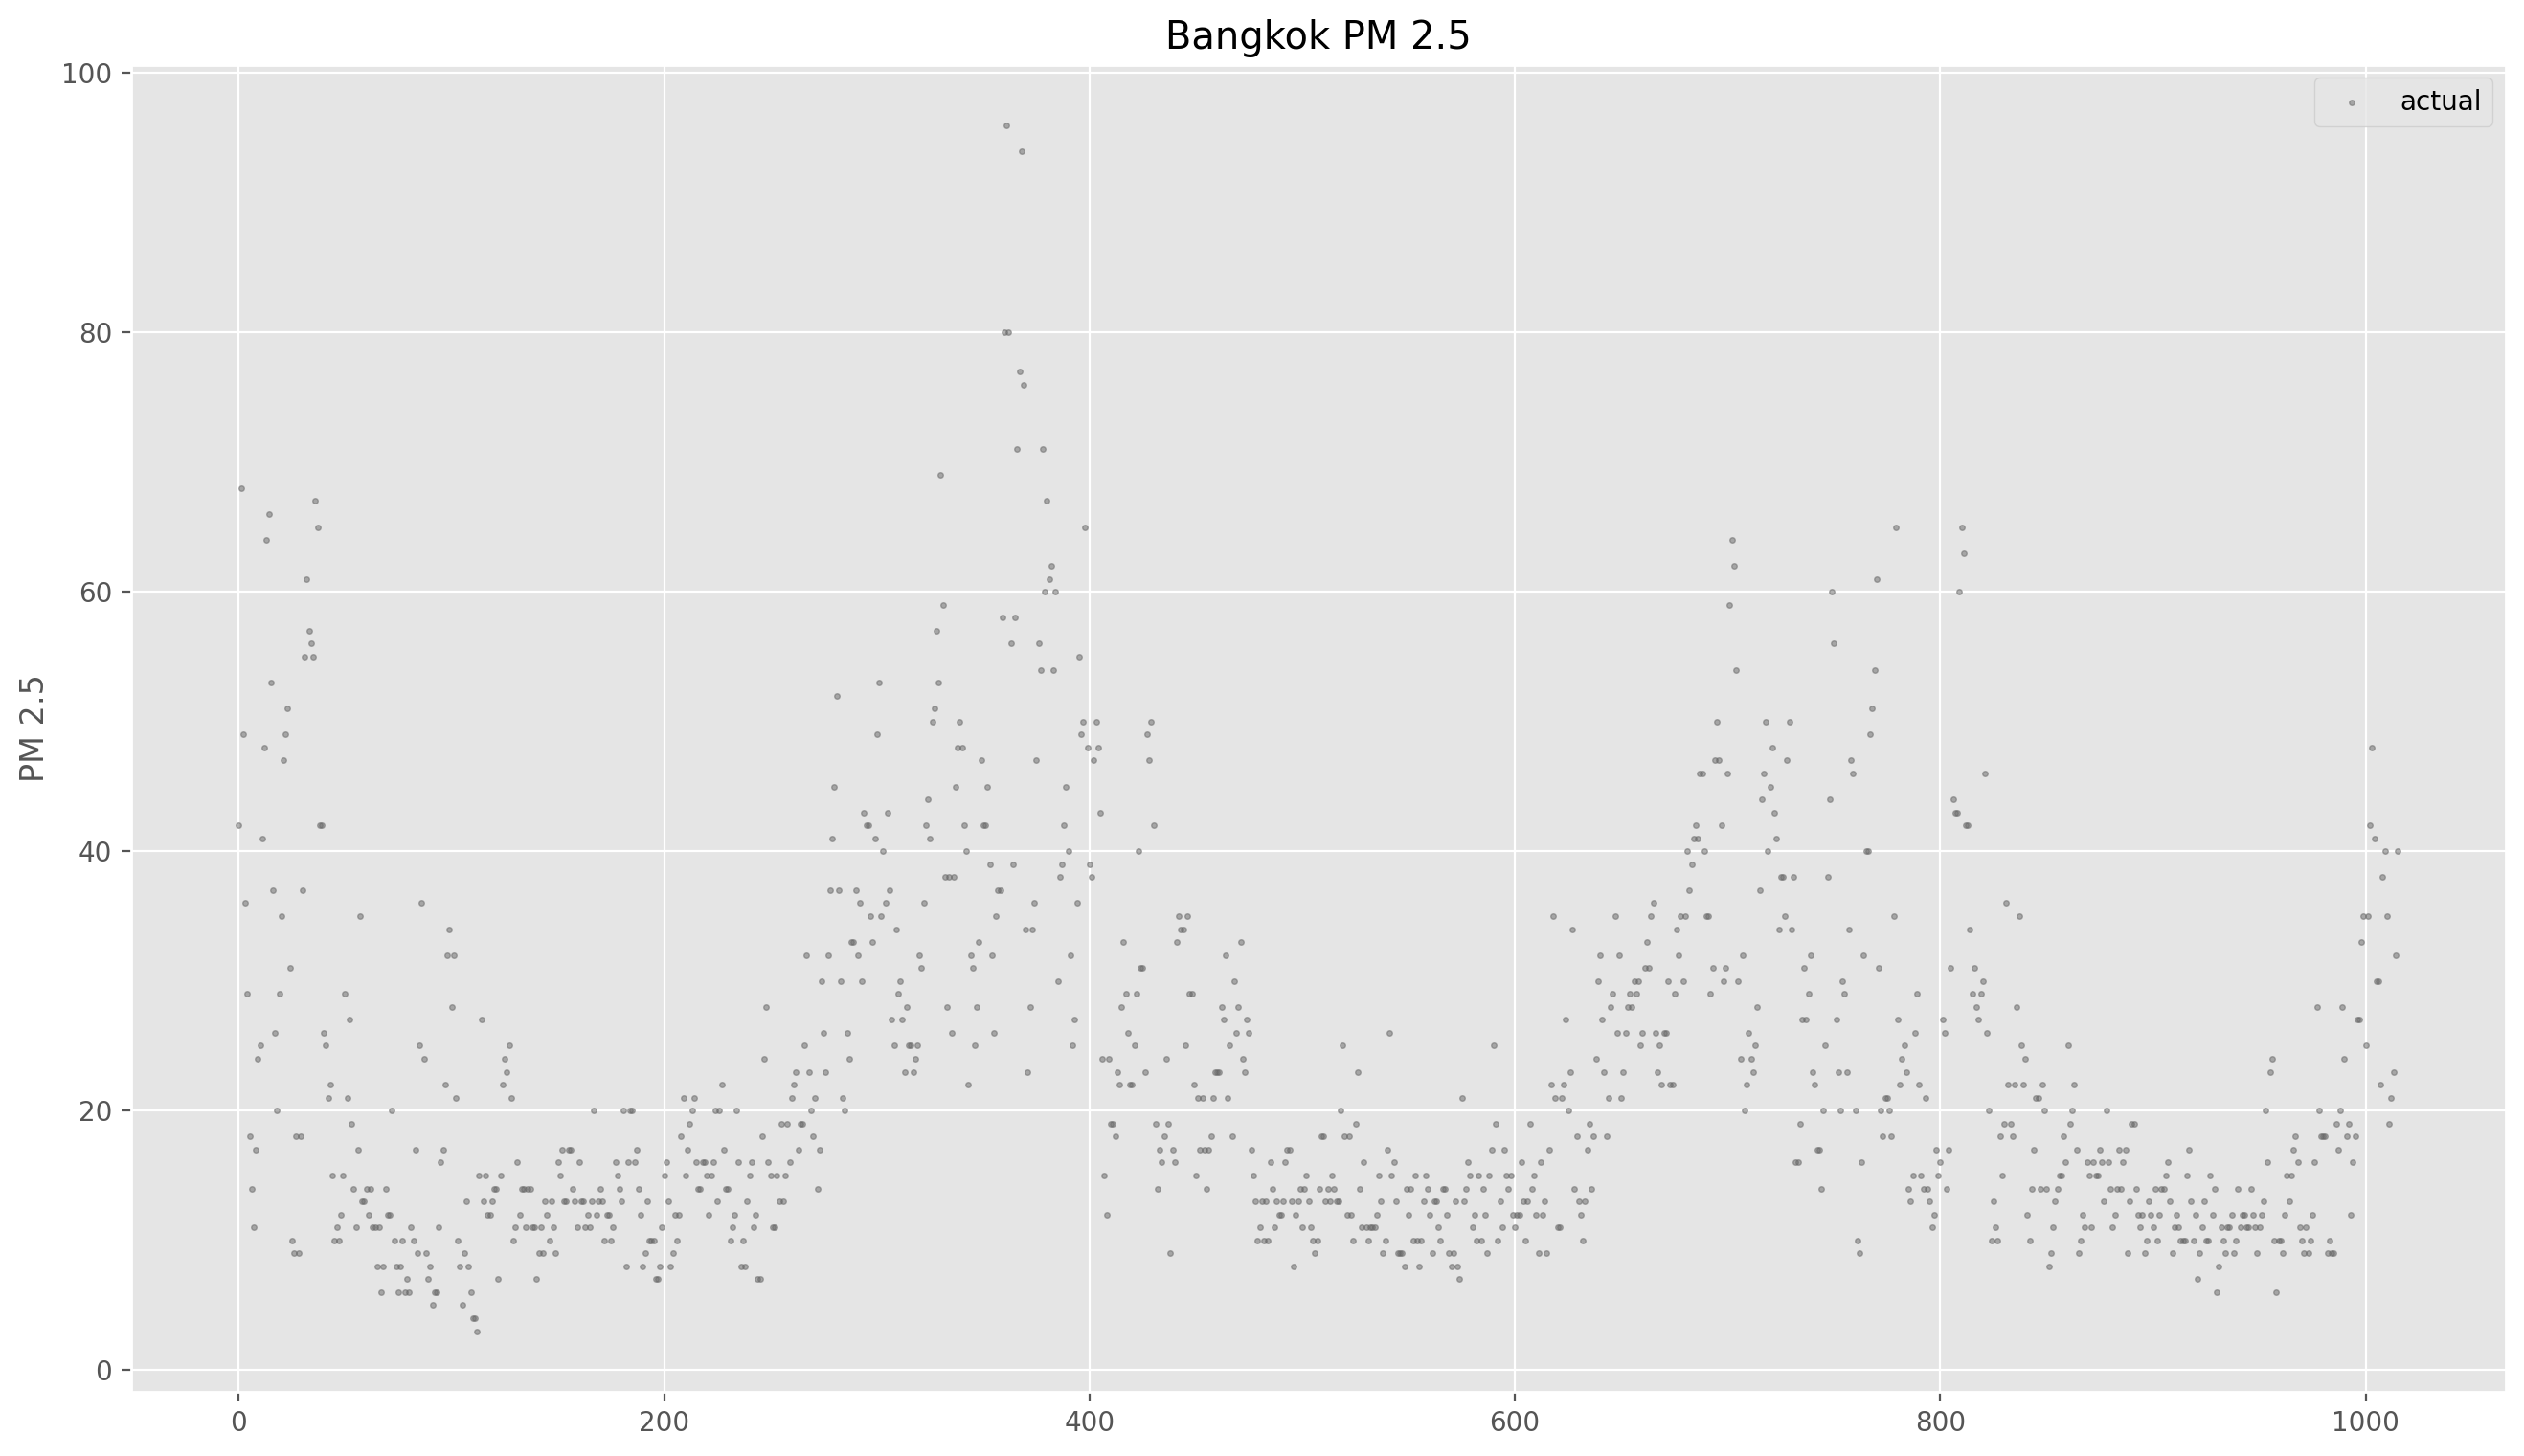

In [333]:
plt.figure(figsize=(16, 9))
plt.scatter(df.index, df[y_col], alpha=.5, s=4, label='actual', color='.4')
plt.ylabel('PM 2.5')
plt.title('Bangkok PM 2.5')
plt.legend();

In [334]:
feature_cols=[
    'year', 'month', 
    'day', 
    'day_name'
]
X=df[feature_cols]
y=df[y_col]

In [335]:
df=data.copy()
df['y']=df['pm25'].shift(-1)

In [361]:
train=df[:-900]
test=df[-900:]
test=test.drop(test.tail(1).index)

In [362]:
X_train1 = train['y'].values.reshape(-1,1)
y_test1 = test['pm25'].values.reshape(-1,1)
y_train1 = train['y'].values.reshape(-1,1)
X_test1 =test['pm25'].values.reshape(-1,1)

In [363]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=42)
reg.fit(X=X_train1, y=y_train1.ravel())
reg_pred = reg.predict(X_test1)
test['gbr_pred'] = reg_pred
test

date   pm10    co     no   no2    nox  pm25  avgT  humid  \
116  2020-05-14   23.0  0.30    7.7  10.3   18.0  15.0  34.3     68   
117  2020-05-15   21.0  0.26    6.1   8.2   14.3  12.0  33.8     69   
118  2020-05-16   22.0  0.26    5.2   7.5   12.8  12.0  33.8     67   
119  2020-05-17   22.0  0.29    7.5   8.1   15.6  13.0  33.4     70   
120  2020-05-18   25.0  0.38   13.0  11.0   24.0  14.0  34.1     66   
...         ...    ...   ...    ...   ...    ...   ...   ...    ...   
1010 2022-10-26  107.0  1.70  115.4  56.3  171.7  35.0  30.3     69   
1011 2022-10-27   84.0  1.50  117.6  35.2  152.9  19.0  28.5     79   
1012 2022-10-28   92.0  1.60  127.1  38.1  165.2  21.0  29.6     72   
1013 2022-10-29   90.0  1.30   92.0  43.1  135.1  23.0  29.5     62   
1014 2022-10-30   95.0  1.30   76.9  51.5  128.4  32.0  30.0     62   

      pressure-monthly  windDir  windSpd  year  month  day   day_name     y  \
116            1007.07    180.0      8.0  2020      5   14   Thursday  12.0   
117            1007.07    250.0     12.0  2020      5   15     Friday  12.0   
118            1007.07    180.0     14.0  2020      5   16   Saturday  13.0   
119            1007.07    160.0      8.0  2020      5   17     Sunday  14.0   
120            1007.07    150.0      7.0  2020      5   18     Monday  14.0   
...                ...      ...      ...   ...    ...  ...        ...   ...   
1010           1009.24    110.0      7.0  2022     10   26  Wednesday  19.0   
1011           1009.24    120.0      9.0  2022     10   27   Thursday  21.0   
1012           1009.24    170.0      7.0  2022     10   28     Friday  23.0   
1013           1009.24    120.0     13.0  2022     10   29   Saturday  32.0   
1014           1009.24    120.0     13.0  2022     10   30     Sunday  40.0   

       gbr_pred  
116   14.994044  
117   12.000233  
118   12.000233  
119   13.000190  
120   13.999979  
...         ...  
1010  34.999511  
1011  19.018585  
1012  21.000086  
1013  21.999823  
1014  31.999566  

[899 rows x 18 columns]

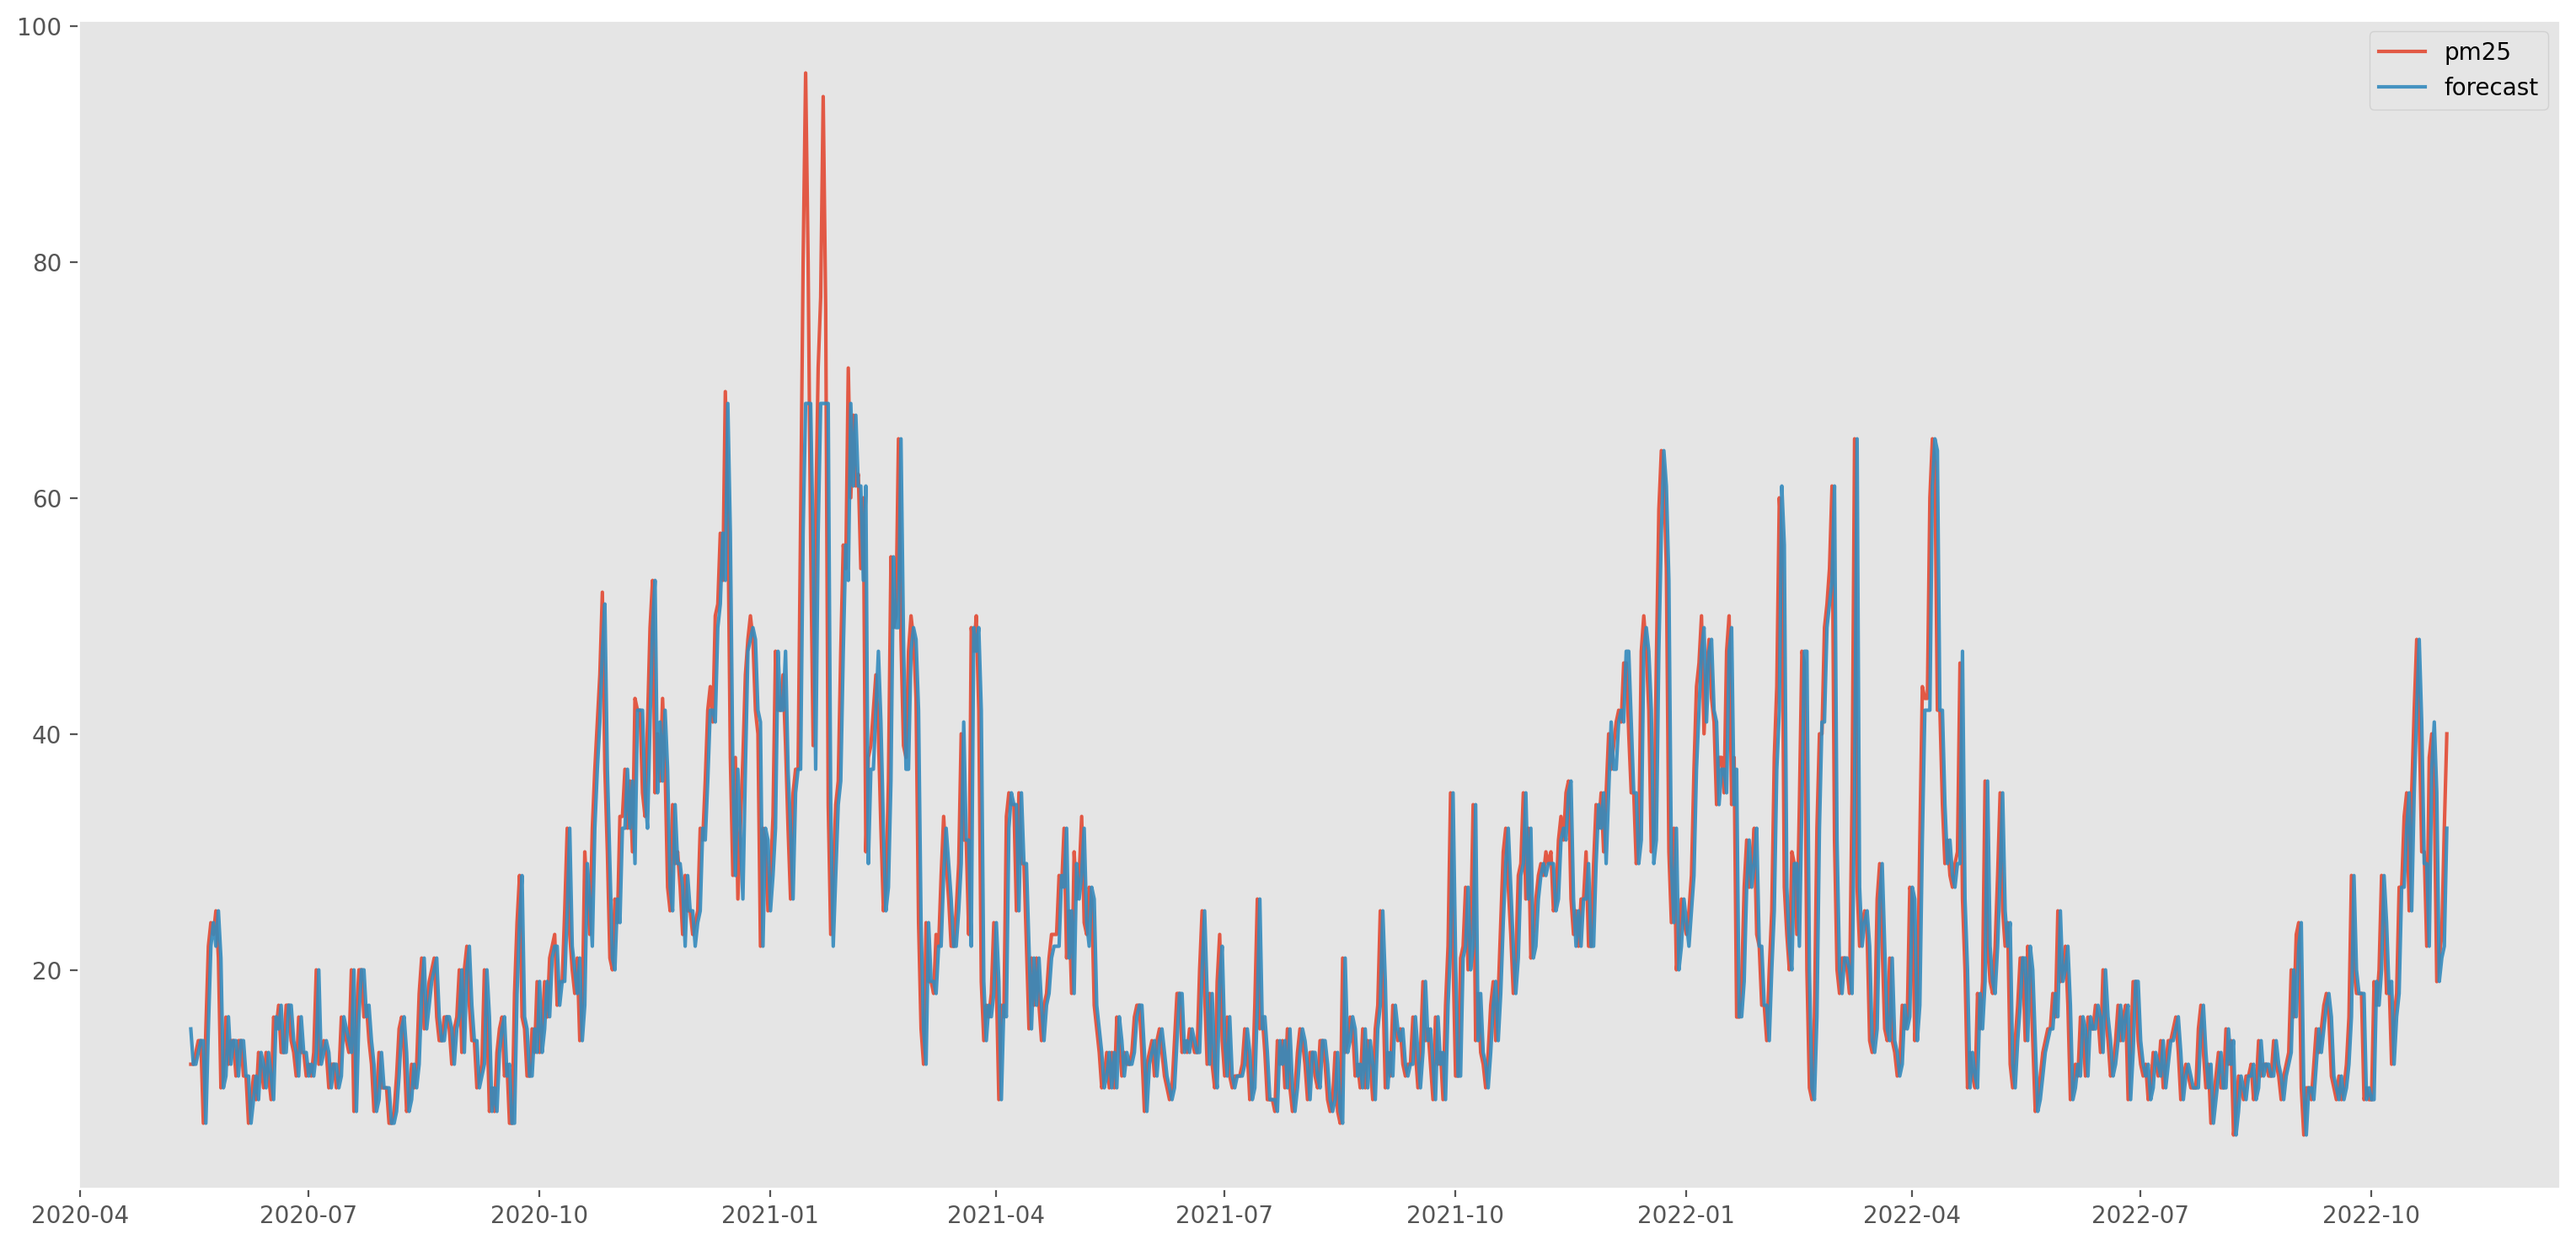

In [364]:
# test พยากรณ์กราฟ
yhat = reg.predict(X_test1)

# Constructing the forecast dataframe
fc = df.tail(len(yhat)).copy() #ข้อมูลส่วนท้ายเป็น test
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(19, 9))
for dtype in ['pm25', 'forecast']: #'forecast'

    plt.plot(
        'date',
        dtype,
        data=fc,
        label=dtype,
        alpha=0.9
    )
plt.legend()
plt.grid()
plt.show()

In [365]:
reg.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [366]:
params={'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
}
# reg = lgb.LGBMRegressor()
# reg = lgb.LGBMRegressor(**params)

In [367]:
reg.__dict__

{'n_estimators': 100,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'criterion': 'friedman_mse',
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'subsample': 1.0,
 'max_features': None,
 'max_depth': 3,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0,
 'init': None,
 'random_state': 42,
 'alpha': 0.9,
 'verbose': 0,
 'max_leaf_nodes': None,
 'warm_start': False,
 'validation_fraction': 0.1,
 'n_iter_no_change': None,
 'tol': 0.0001,
 'n_features_in_': 1,
 '_loss': <sklearn.ensemble._gb_losses.LeastSquaresError at 0x7ff335b97970>,
 'max_features_': 1,
 'init_': DummyRegressor(),
 'estimators_': array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                               random_state=RandomState(MT19937) at 0x7FF32FF3F240)],
        [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                               random_state=RandomState(MT19937) at 0x7FF32FF3F240)],
        [DecisionTreeRegressor(criterion='fried

In [368]:
yhat=[]
yhat = reg.predict(X_test1)

In [369]:
Y_Pred=reg.predict(X_test1)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(X_test1,Y_Pred)
print('Mse',mse)
rmse = np.sqrt(mse)
print('Rmse',rmse)

Mse 2.3155827046891613
Rmse 1.5217038820641686


In [370]:
fig = plt.figure()      
ax = fig   

<Figure size 2000x1000 with 0 Axes>

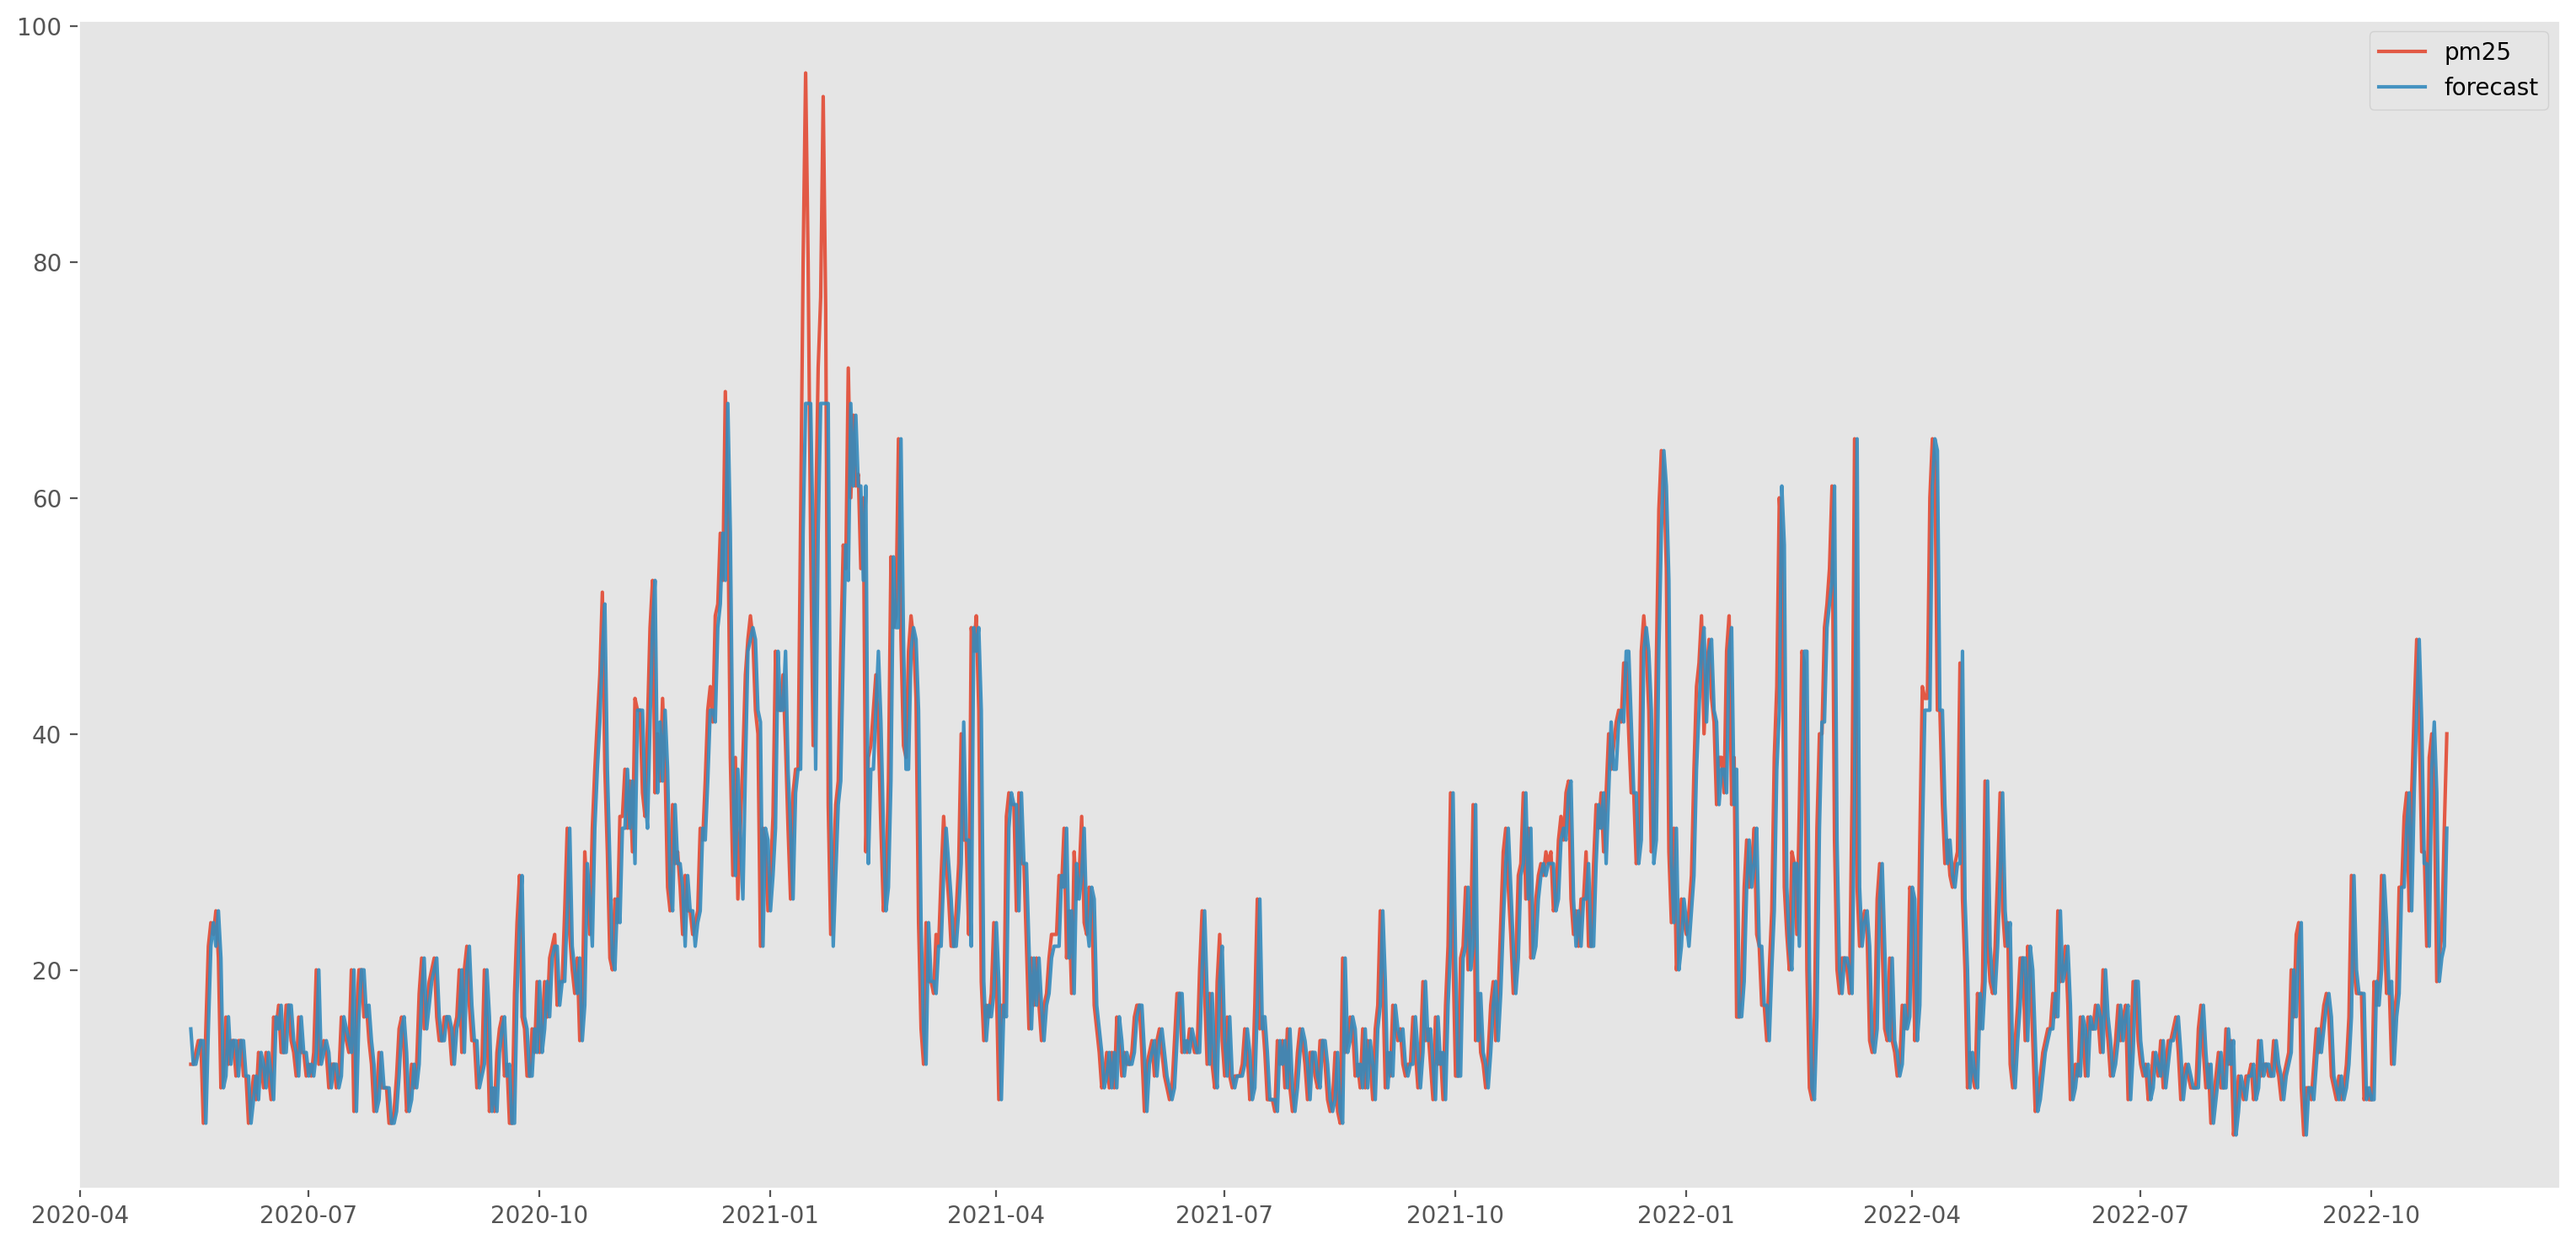

In [371]:
# test พยากรณ์กราฟ
yhat = reg.predict(X_test1)

# Constructing the forecast dataframe
fc = df.tail(len(yhat)).copy() #ข้อมูลส่วนท้ายเป็น test
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(19, 9))
for dtype in ['pm25', 'forecast']: #'forecast'

    plt.plot(
        'date',
        dtype,
        data=fc,
        label=dtype,
        alpha=0.9
    )
plt.legend()
plt.grid()
plt.show()

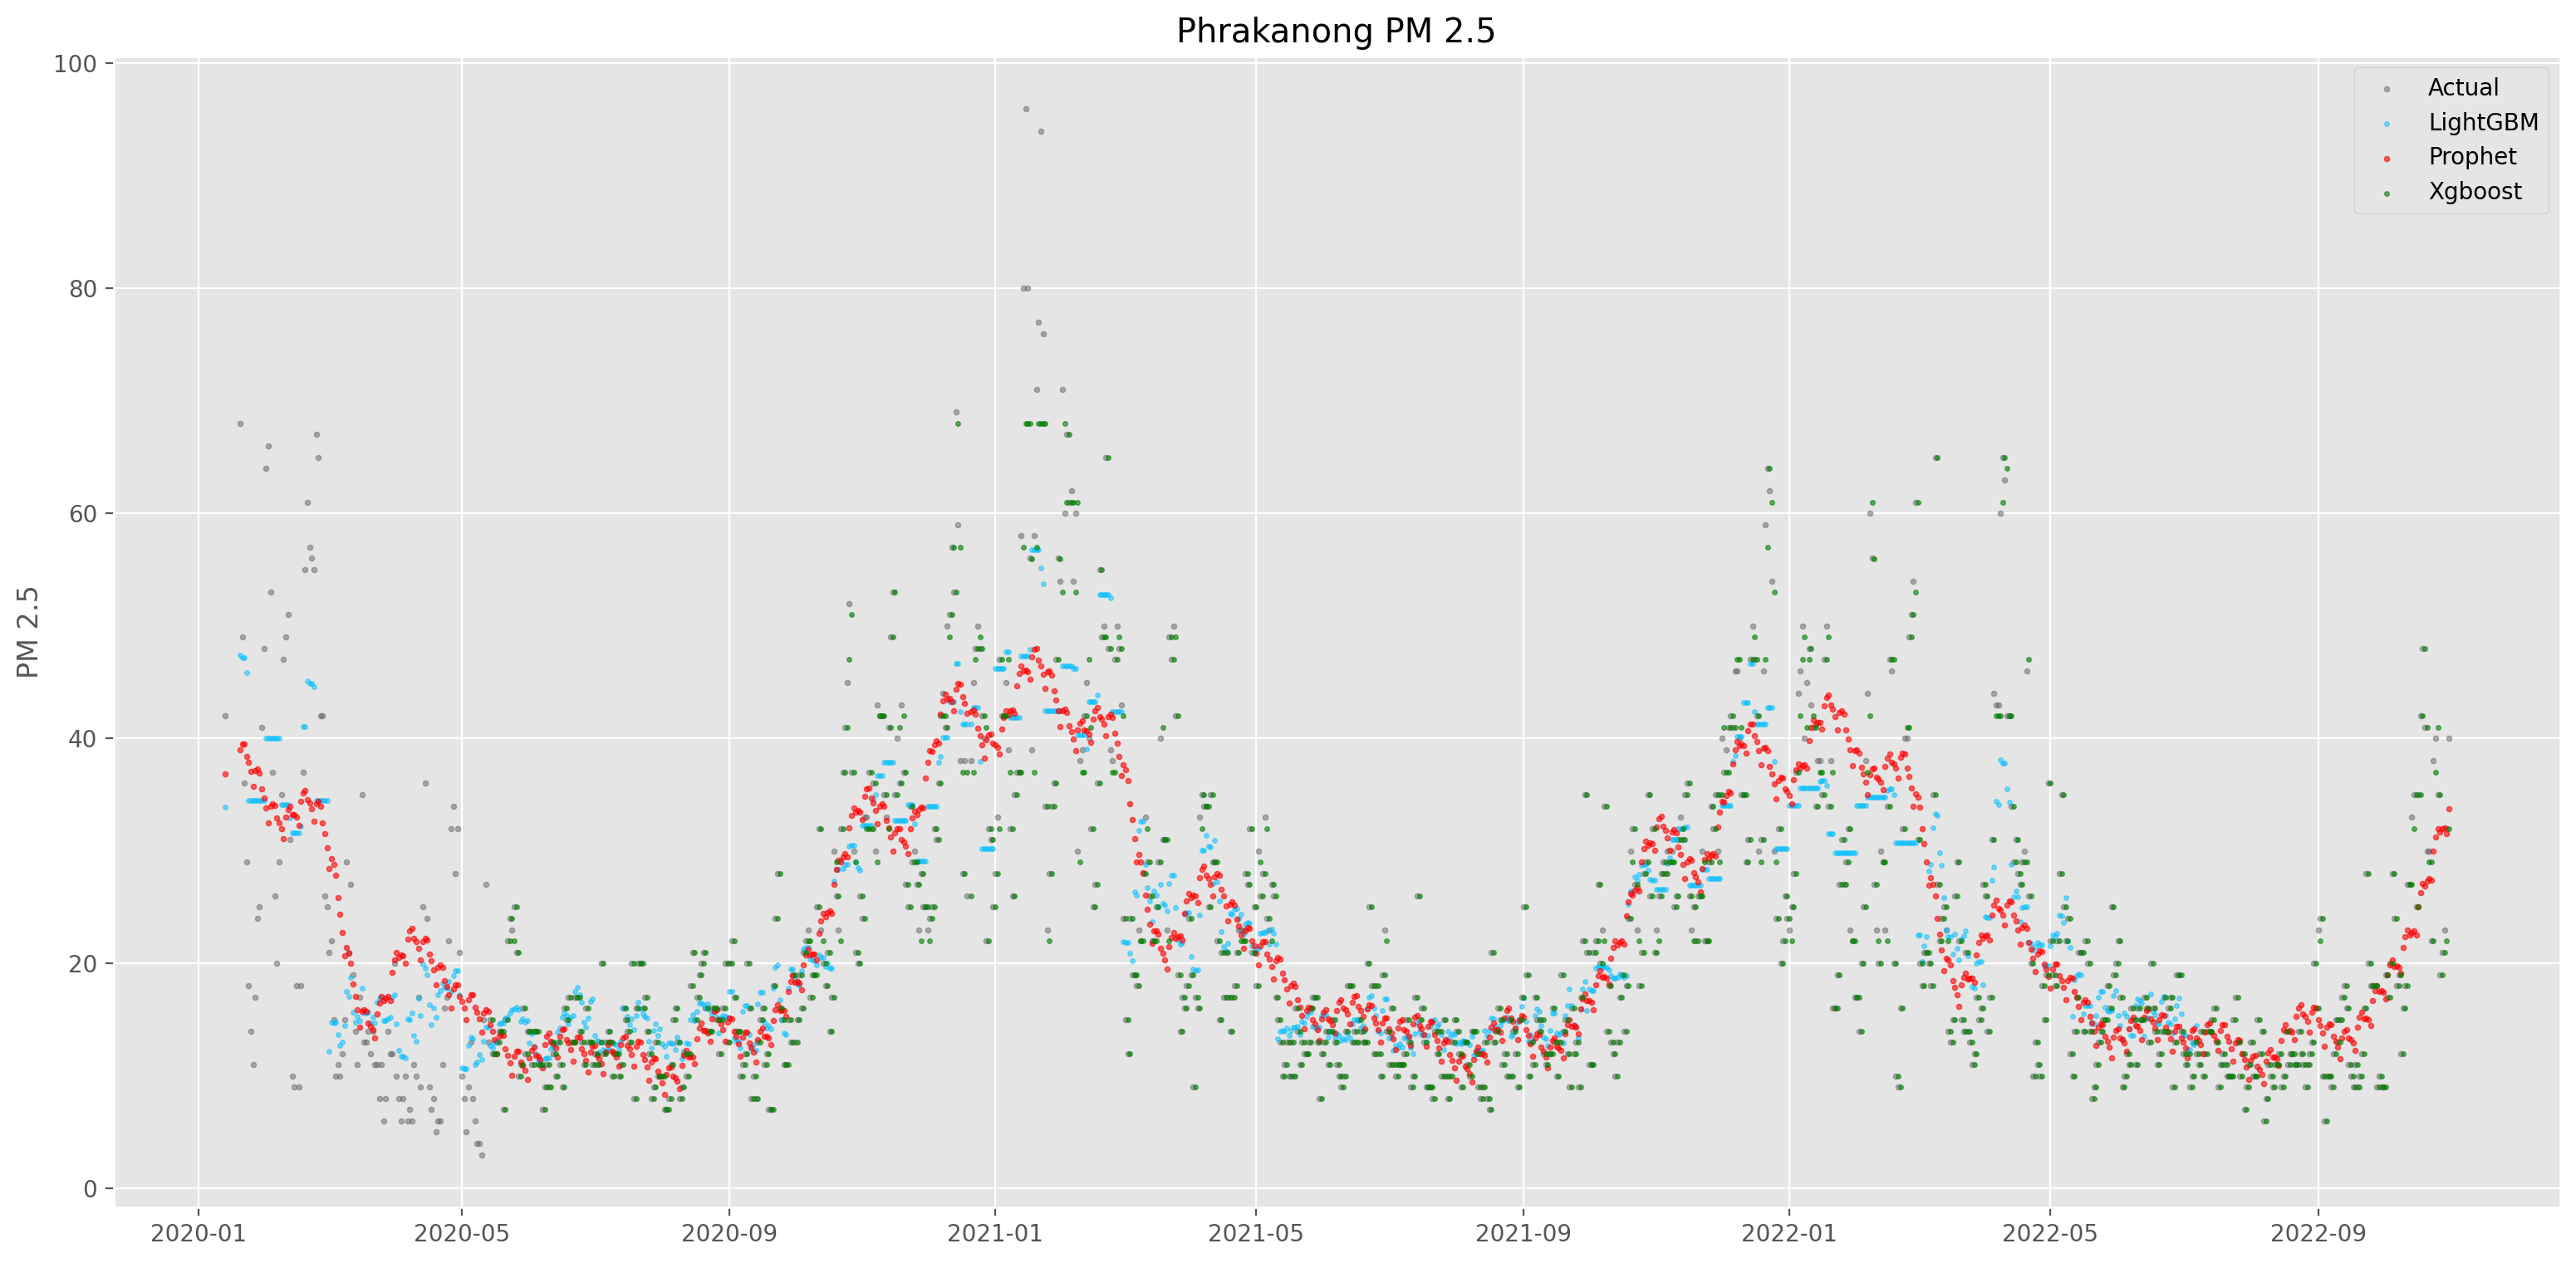

In [403]:
# กราฟ train LightGBM, Prophet, Xgboot
plt.figure(figsize=(19, 9))
plt.scatter(df1.index, df1[y_col], alpha=.5, label='Actual', s=5,color='.4')
plt.scatter(X_train.index, light_reg.predict(X_train), alpha=.5, s=4, label='LightGBM', color='deepskyblue')
plt.scatter(dt['ds'], dt['yhat'], label='Prophet',s=5, alpha=.6,color='red')
plt.scatter('date',dtype,data=fc,alpha=.6,s=4,label='Xgboost', color='green')

plt.ylabel('PM 2.5')
plt.title('Phrakanong PM 2.5')
plt.legend();

#plt.scatter(X_test.index, light_reg.predict(X_test), alpha=.5, s=4, label='predict_X_test', color='orange
#plt.scatter('date',dtype,data=fc,label='xgboost',alpha=.5 ,s=4,color='red')
#plt.scatter(dt['ds'], dt['yhat'], label='Prophet',s=5, alpha=.6,color='blue')
#-------------
#plt.scatter(train.index, reg.predict(X_train1), alpha=.5, s=4, label='Xgboost', color='green')
#plt.scatter(test.index, reg.predict(X_test1), alpha=.5, s=4, label='Xgboost', color='green')
#plt.scatter(X_test.index, light_reg.predict(X_test), alpha=.5, s=4, label='LightGBM_test', color='orange')
